In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1                  0          5           5            5                  0   
2                  0          7          11            4                  1   
3                  0          4           5            5                  1   
4                  0          6           6            6                  0   
...              ...        ...         ...          ...                ...   
9874               1          7           4            5                  1   
9875               0          6           4            8                  1   
9876               0          6           7            5                  0   
9877               1          2           3            3                  1   
9878               1          6           6            5                  0   

      blueDragons  ...  redTowersDestroyed  redTotalGold  redAvgLevel  \
0               0  ...                   0         16567          6.8   
1               0  ...                   1         17620          6.8   
2               1  ...                   0         17285          6.8   
3               0  ...                   0         16478          7.0   
4               0  ...                   0         17404          7.0   
...           ...  ...                 ...           ...          ...   
9874            1  ...                   0         15246          6.8   
9875            1  ...                   0         15456          7.0   
9876            0  ...                   0         18319          7.4   
9877            1  ...                   0         15298          7.2   
9878            0  ...                   0         15339          6.8   

      redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
0                  17047                    197                           55   
1                  17438                    240                           52   
2                  17254                    203                           28   
3                  17961                    235                           47   
4                  18313                    225                           67   
...                  ...                    ...                          ...   
9874               16498                    229                           34   
9875               18367                    206                           56   
9876               19909                    261                           60   
9877               18314                    247                           40   
9878               17379                    201                           46   

      redGoldDiff  redExperienceDiff  redCSPerMin  redGoldPerMin  
0            -643                  8         19.7         1656.7  
1            2908               1173         24.0         1762.0  
2            1172               1033         20.3         1728.5  
3            1321                  7         23.5         1647.8  
4            1004               -230         22.5         1740.4  
...           ..

## Verificare daca exista valori NaN

In [3]:
df.isna().any().any()

np.False_

## Verificare matrice de corelatie
### Heatmap

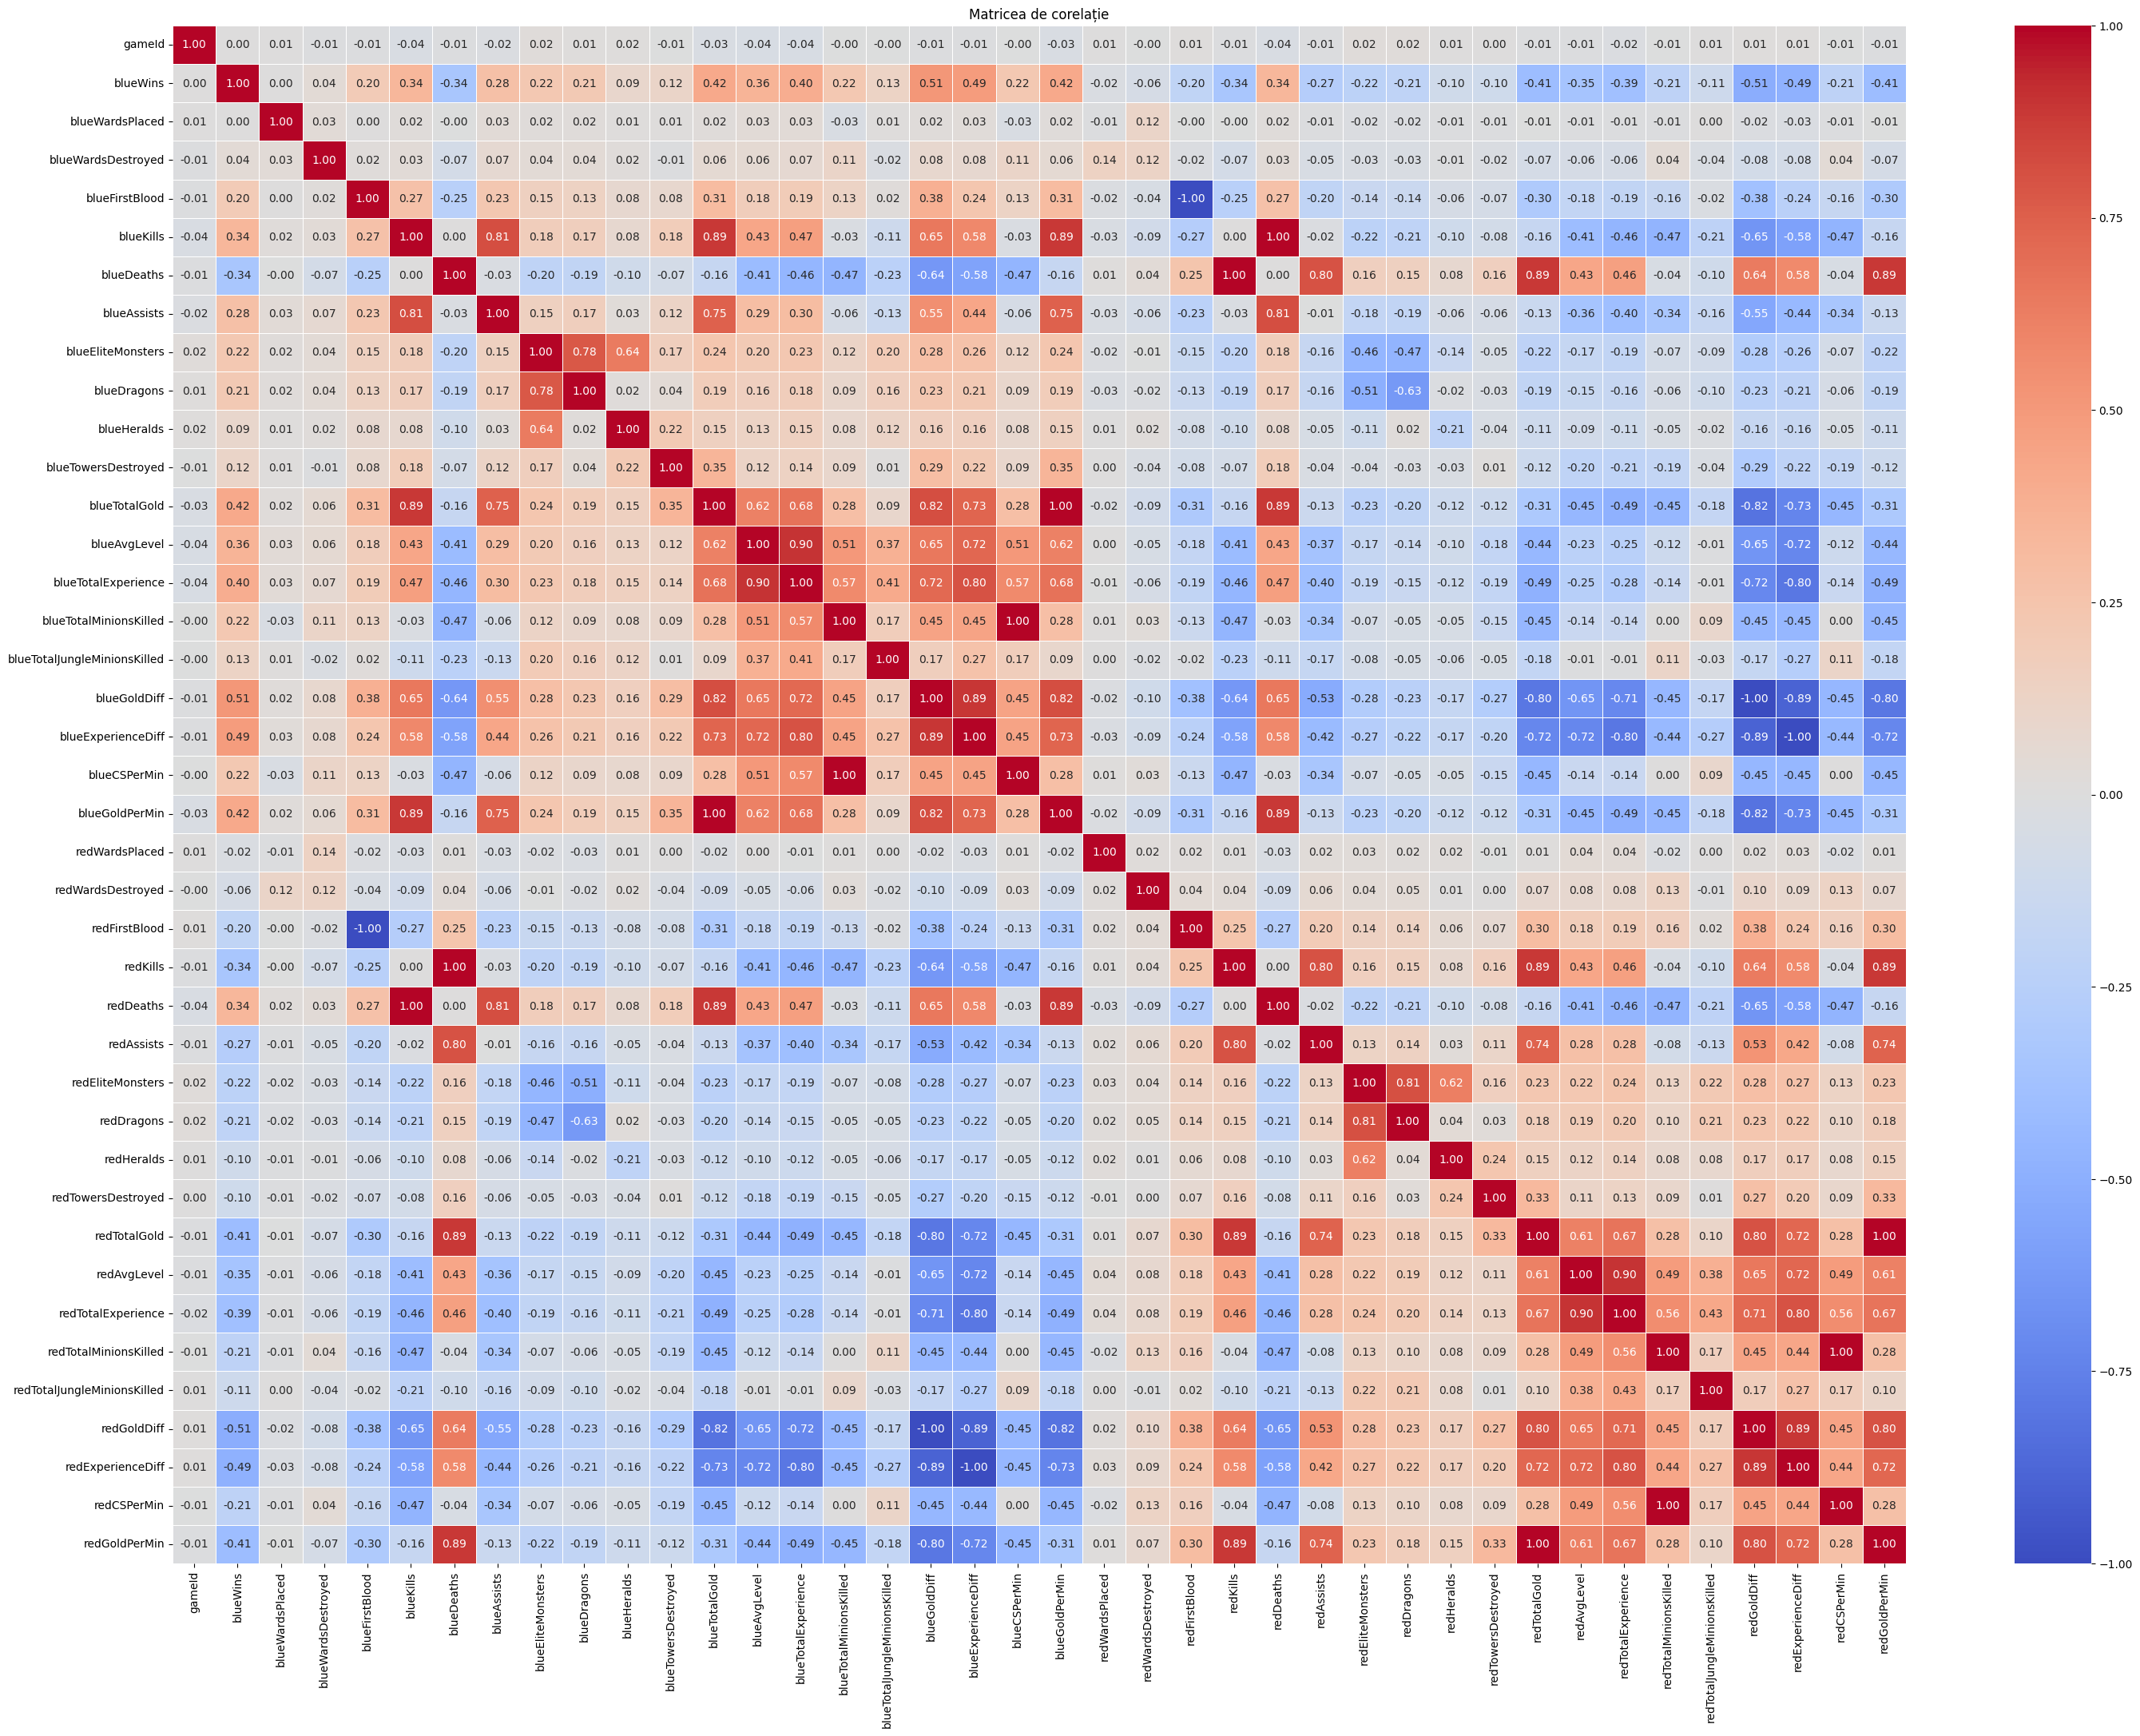

In [4]:
correlation_matrix = df.corr()

# Afișează matricea de corelație
correlation_matrix
plt.figure(figsize=(35, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matricea de corelație')
plt.show()


## Verificare daca exista corelatii cu valori mai mari de 0.95

In [5]:
corr_unstack = correlation_matrix.unstack().reset_index()
corr_unstack.columns = ['var1', 'var2', 'correlation']

# Filtrează corelațiile mai mari de 0.95 și elimină auto-corelațiile (variabilă cu ea însăși)
high_corr = corr_unstack[(abs(corr_unstack['correlation']) > 0.95) & 
                         (corr_unstack['var1'] != corr_unstack['var2'])]

# Elimină duplicate (A-B și B-A reprezintă aceeași corelație)
high_corr = high_corr[high_corr['var1'] < high_corr['var2']]

# Sortează rezultatele după valoarea corelației (descrescător)
high_corr = high_corr.sort_values('correlation', ascending=False)

# Afișează rezultatele
high_corr


var1                    var2  correlation
775         blueCSPerMin  blueTotalMinionsKilled          1.0
812       blueGoldPerMin           blueTotalGold          1.0
1591       redGoldPerMin            redTotalGold          1.0
264           blueDeaths                redKills          1.0
225            blueKills               redDeaths          1.0
1554         redCSPerMin   redTotalMinionsKilled          1.0
757   blueExperienceDiff       redExperienceDiff         -1.0
716         blueGoldDiff             redGoldDiff         -1.0
183       blueFirstBlood           redFirstBlood         -1.0

## Eliminarea corelatiilor mai mari de 0.95 , pastrarea variabilei Redkills in schimbul BlueDeaths

In [6]:
# Creează o listă de coloane de eliminat bazată pe corelațiile mari
columns_to_drop = []

# Parcurge toate perechile de variabile puternic corelate
for _, row in high_corr.iterrows():
    var1, var2 = row['var1'], row['var2']
    
    # Cazul specific: dacă perechea conține blueDeaths și redKills
    if ('blueDeaths' in [var1, var2] and 'redKills' in [var1, var2]):
        columns_to_drop.append('blueDeaths')  # Elimină întotdeauna blueDeaths
    else:
        # Altfel, păstrează comportamentul original
        columns_to_drop.append(var2)

# Elimină duplicate din lista de coloane (dacă există)
columns_to_drop = list(set(columns_to_drop))

# Creează un nou DataFrame fără variabilele puternic corelate
df = df.drop(columns=columns_to_drop)

# Afișează câte coloane au fost eliminate
print(f"Au fost eliminate {len(columns_to_drop)} coloane din {df.shape[1]} (rămase {df.shape[1]}):")
print(columns_to_drop)

# Afișează noul DataFrame
df.head()


Au fost eliminate 9 coloane din 31 (rămase 31):
['redDeaths', 'redFirstBlood', 'redTotalMinionsKilled', 'redExperienceDiff', 'redGoldDiff', 'redTotalGold', 'blueTotalGold', 'blueTotalMinionsKilled', 'blueDeaths']


gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  ...  \
0          9           11                  0            0            0  ...   
1          5            5                  0            0            0  ...   
2          7            4                  1            1            0  ...   
3          4            5                  1            0            1  ...   
4          6            6                  0            0            0  ...   

   redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  \
0           8                 0           0           0                   0   
1           2                 2           1           1                   1   
2          14                 0           0           0                   0   
3          10                 0           0           0                   0   
4           7                 1           1           0                   0   

   redAvgLevel  redTotalExperience  redTotalJungleMinionsKilled  redCSPerMin  \
0          6.8               17047                           55         19.7   
1          6.8               17438                           52         24.0   
2          6.8               17254                           28         20.3   
3          7.0               17961                           47         23.5   
4          7.0               18313                           67         22.5   

   redGoldPerMin  
0         1656.7  
1         1762.0  
2         1728.5  
3         1647.8  
4         1740.4  

[5 rows x 31 columns]

## Verificare daca exista duplicate

In [7]:

duplicate_count = df.duplicated().sum()

# Afișează rezultatul
print(f"Număr de rânduri duplicate: {duplicate_count}")

# Dacă există duplicate, afișează-le
if duplicate_count > 0:
    print("\nExemple de rânduri duplicate:")
    duplicates = df[df.duplicated(keep='first')]
    display(duplicates.head())
    
    # Opțional: Afișează toate duplicatele cu rândurile originale
    print("\nToate rândurile duplicate și originalele lor:")
    all_duplicates = df[df.duplicated(keep=False)]
    display(all_duplicates.sort_values(by=all_duplicates.columns.tolist()))


Număr de rânduri duplicate: 0


##  Verificare daca exista valori NULL

In [8]:
has_null = df.isnull().values.any()
print(f"DataFrame-ul conține valori null: {has_null}")

# Numărul total de valori null
total_null = df.isnull().sum().sum()
print(f"Numărul total de valori null: {total_null}")


DataFrame-ul conține valori null: False
Numărul total de valori null: 0


## Histograma


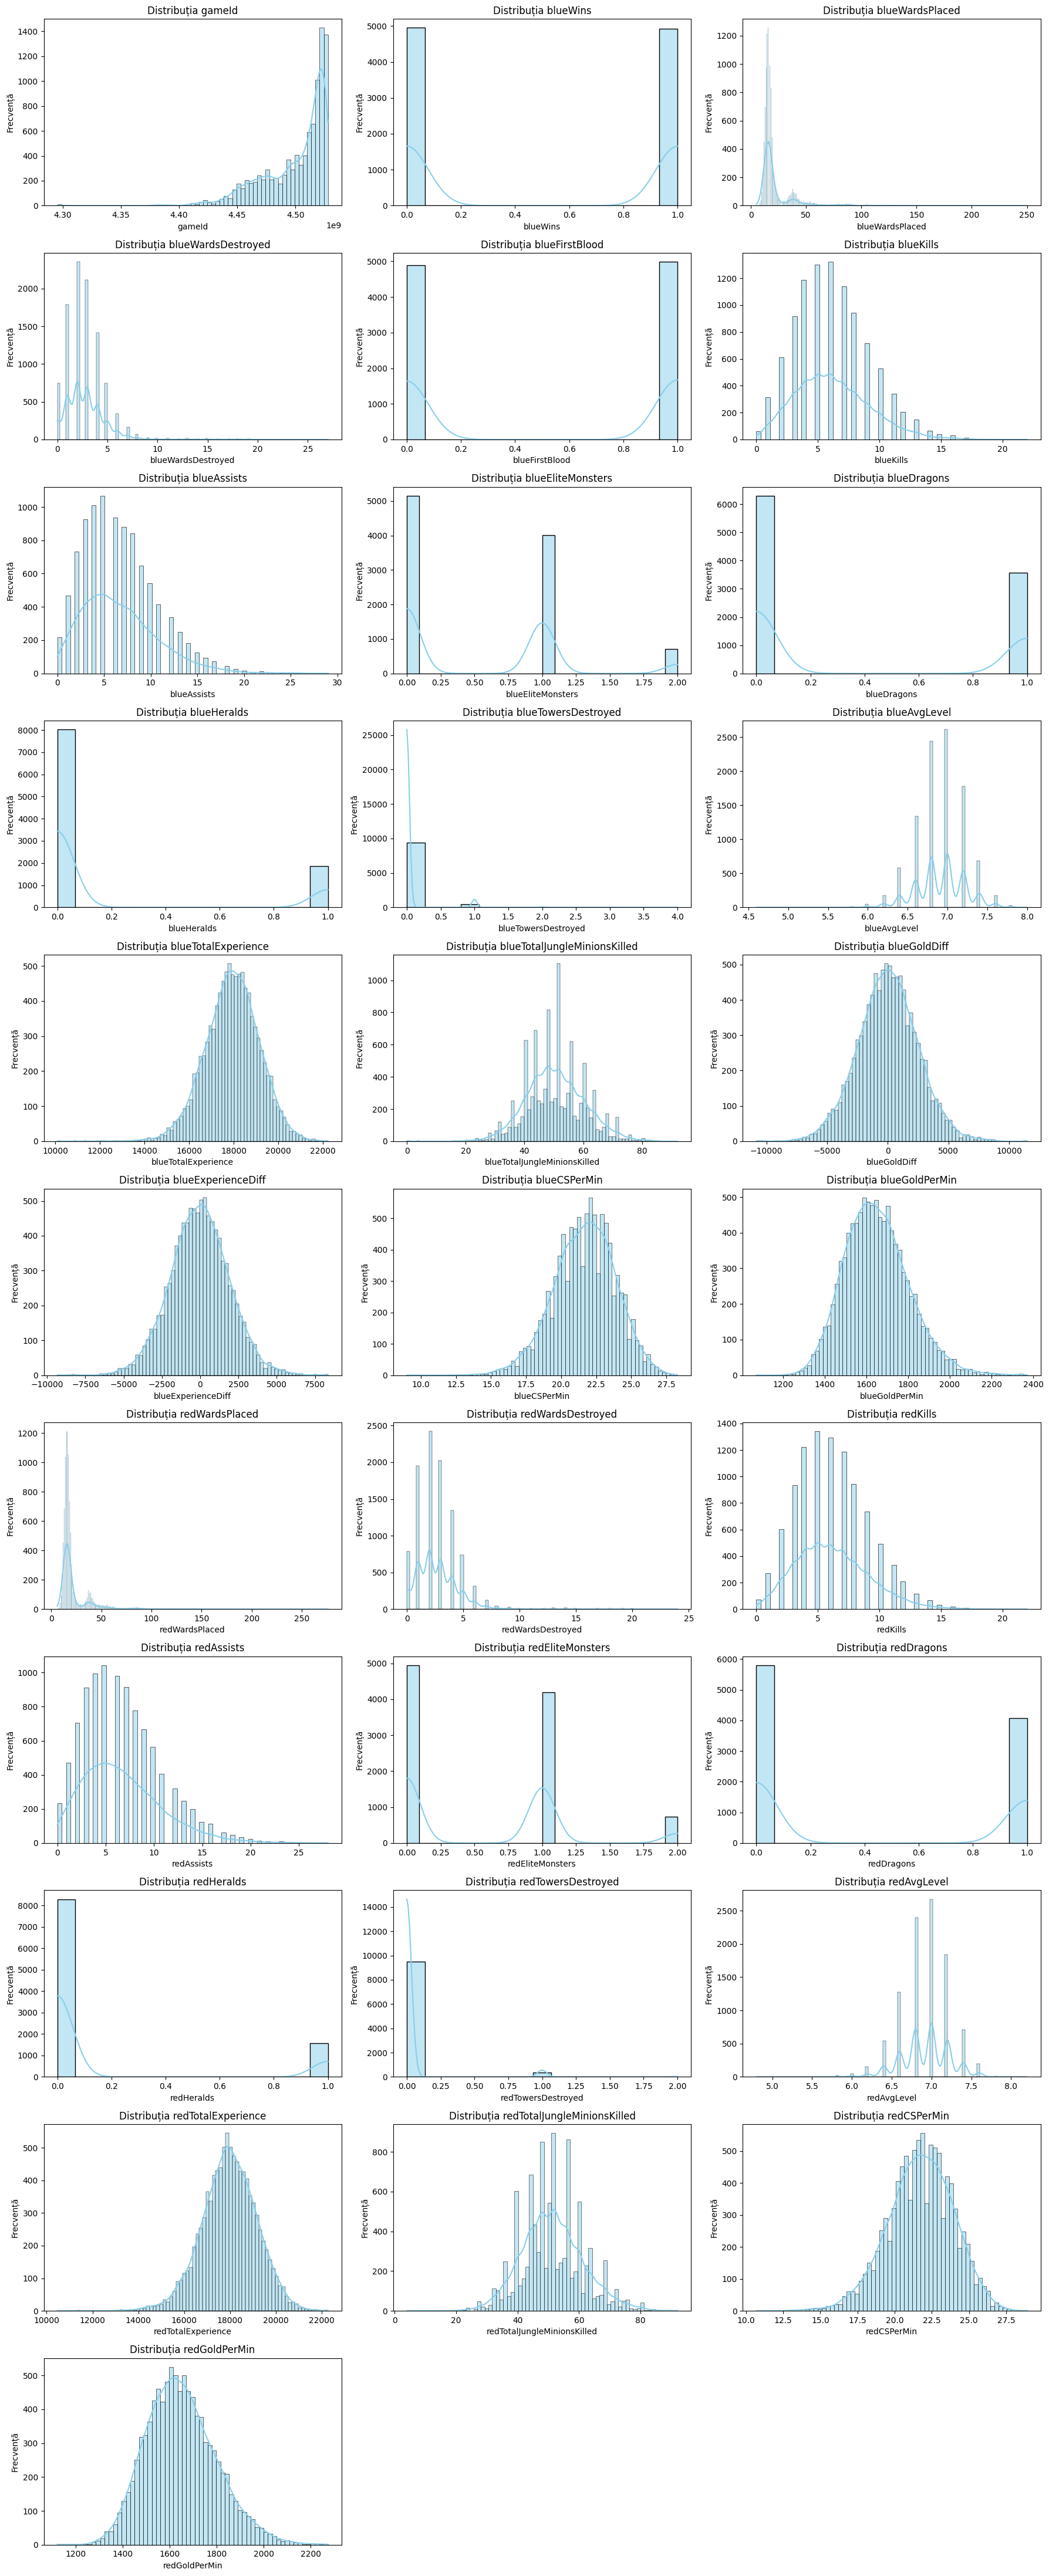

In [9]:

# Selectează doar coloanele numerice
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_cols)

# Calculează numărul de rânduri și coloane pentru subplot grid
import math
n_rows = math.ceil(num_cols / 3)

# Creează histograme pentru toate coloanele numerice
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribuția {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecvență')
    
# Ascunde axele rămase nefolosite (dacă există)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()


## Describe

In [10]:
df.describe()

gameId     blueWins  blueWardsPlaced  blueWardsDestroyed  \
count  9.879000e+03  9879.000000      9879.000000         9879.000000   
mean   4.500084e+09     0.499038        22.288288            2.824881   
std    2.757328e+07     0.500024        18.019177            2.174998   
min    4.295358e+09     0.000000         5.000000            0.000000   
25%    4.483301e+09     0.000000        14.000000            1.000000   
50%    4.510920e+09     0.000000        16.000000            3.000000   
75%    4.521733e+09     1.000000        20.000000            4.000000   
max    4.527991e+09     1.000000       250.000000           27.000000   

       blueFirstBlood    blueKills  blueAssists  blueEliteMonsters  \
count     9879.000000  9879.000000  9879.000000        9879.000000   
mean         0.504808     6.183925     6.645106           0.549954   
std          0.500002     3.011028     4.064520           0.625527   
min          0.000000     0.000000     0.000000           0.000000   
25%          0.000000     4.000000     4.000000           0.000000   
50%          1.000000     6.000000     6.000000           0.000000   
75%          1.000000     8.000000     9.000000           1.000000   
max          1.000000    22.000000    29.000000           2.000000   

       blueDragons  blueHeralds  ...   redAssists  redEliteMonsters  \
count  9879.000000  9879.000000  ...  9879.000000       9879.000000   
mean      0.361980     0.187974  ...     6.662112          0.573135   
std       0.480597     0.390712  ...     4.060612          0.626482   
min       0.000000     0.000000  ...     0.000000          0.000000   
25%       0.000000     0.000000  ...     4.000000          0.000000   
50%       0.000000     0.000000  ...     6.000000          0.000000   
75%       1.000000     0.000000  ...     9.000000          1.000000   
max       1.000000     1.000000  ...    28.000000          2.000000   

        redDragons   redHeralds  redTowersDestroyed  redAvgLevel  \
count  9879.000000  9879.000000         9879.000000  9879.000000   
mean      0.413098     0.160036            0.043021     6.925316   
std       0.492415     0.366658            0.216900     0.305311   
min       0.000000     0.000000            0.000000     4.800000   
25%       0.000000     0.000000            0.000000     6.800000   
50%       0.000000     0.000000            0.000000     7.000000   
75%       1.000000     0.000000            0.000000     7.200000   
max       1.000000     1.000000            2.000000     8.200000   

       redTotalExperience  redTotalJungleMinionsKilled  redCSPerMin  \
count         9879.000000                  9879.000000  9879.000000   
mean         17961.730438                    51.313088    21.734923   
std           1198.583912                    10.027885     2.191167   
min          10465.000000                     4.000000    10.700000   
25%          17209.500000                    44.000000    20.300000   
50%          17974.000000                    51.000000    21.800000   
75%          18764.500000                    57.000000    23.300000   
max          22269.000000                    92.000000    28.900000   

       redGoldPerMin  
count    9879.000000  
mean     1648.904140  
std       149.088841  
min      1121.200000  
25%      1542.750000  
50%      1637.800000  
75%      1741.850000  
max      2273.200000  

[8 rows x 31 columns]

## ENTROPIE


Entropy for each column:
gameId (binned): 1.7355
blueWins: 1.0000
blueWardsPlaced (binned): 0.8771
blueWardsDestroyed (binned): 1.3830
blueFirstBlood: 0.9999
blueKills (binned): 2.4926
blueAssists (binned): 2.4014
blueEliteMonsters: 1.2906
blueDragons: 0.9443
blueHeralds: 0.6972
blueTowersDestroyed: 0.2947
blueAvgLevel (binned): 1.9554
blueTotalExperience (binned): 2.0710
blueTotalJungleMinionsKilled (binned): 2.1853
blueGoldDiff (binned): 2.2306
blueExperienceDiff (binned): 2.2094
blueCSPerMin (binned): 2.2618
blueGoldPerMin (binned): 2.3001
redWardsPlaced (binned): 0.8142
redWardsDestroyed (binned): 1.5322
redKills (binned): 2.4671
redAssists (binned): 2.4182
redEliteMonsters: 1.3020
redDragons: 0.9781
redHeralds: 0.6344
redTowersDestroyed: 0.2578
redAvgLevel (binned): 2.0058
redTotalExperience (binned): 2.1119
redTotalJungleMinionsKilled (binned): 2.2555
redCSPerMin (binned): 2.3415
redGoldPerMin (binned): 2.4355


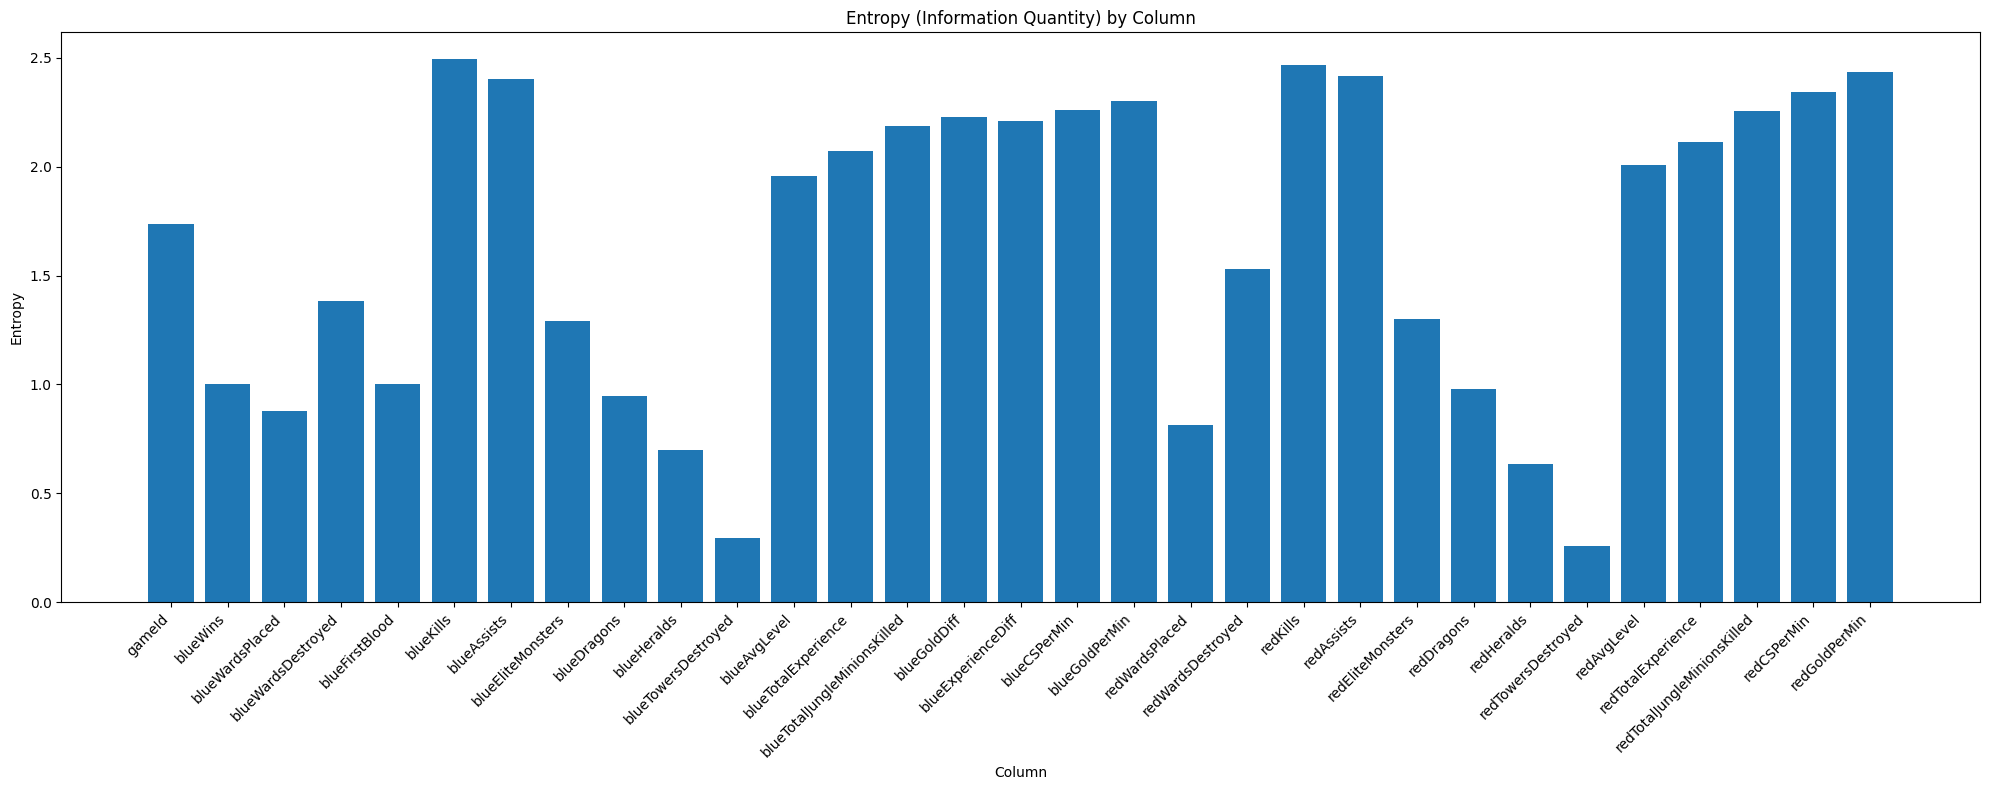

In [11]:
from math import log2

def calculate_entropy(column):
    """
    Calculate entropy (information quantity) for a column
    Entropy = -sum(p_i * log2(p_i)) for all values i
    """
    # Get value counts and convert to probabilities
    value_counts = column.value_counts(normalize=True)
    
    # Calculate entropy using the formula: -sum(p_i * log2(p_i))
    # Skip zero probabilities to avoid log(0) error
    entropy = -sum(p * log2(p) for p in value_counts if p > 0)
    
    return entropy

# Calculate entropy for each column
print("\nEntropy for each column:")
for column in df.columns:
    # For numeric columns, we can bin them into categories for entropy calculation
    if df[column].dtype in ['int64', 'float64'] and df[column].nunique() > 10:
        # Create 10 bins for numeric data
        binned_data = pd.cut(df[column].dropna(), bins=10)
        entropy_value = calculate_entropy(binned_data)
        print(f"{column} (binned): {entropy_value:.4f}")
    else:
        # For categorical or low-cardinality numeric columns
        entropy_value = calculate_entropy(df[column])
        print(f"{column}: {entropy_value:.4f}")

# Visualization for a few selected columns (up to 5)
selected_columns = df.columns  # Change this to select specific columns

plt.figure(figsize=(20, 8))
entropy_values = []

for i, column in enumerate(selected_columns):
    if df[column].dtype in ['int64', 'float64'] and df[column].nunique() > 10:
        binned_data = pd.cut(df[column].dropna(), bins=10)
        entropy_value = calculate_entropy(binned_data)
    else:
        entropy_value = calculate_entropy(df[column])
    
    entropy_values.append(entropy_value)

# Create bar chart
plt.bar(selected_columns, entropy_values)
plt.title('Entropy (Information Quantity) by Column')
plt.xlabel('Column')
plt.ylabel('Entropy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## GINI INDEX

In [12]:
def calculate_gini(column):
    """Calculate Gini impurity for a column"""
    # Get value counts and convert to probabilities
    value_counts = column.value_counts(normalize=True)
    
    # Calculate Gini using the formula: 1 - sum(p_i^2)
    gini = 1 - sum(p**2 for p in value_counts)
    
    return gini

# Example usage (to add to your notebook):
print("\nGini index for each column:")
for column in df.columns:  # First 5 columns
    if df[column].dtype in ['int64', 'float64'] and df[column].nunique() > 10:
        # Create bins for numeric data
        binned_data = pd.cut(df[column].dropna(), bins=10)
        gini_value = calculate_gini(binned_data)
        print(f"{column} (binned): {gini_value:.4f}")
    else:
        gini_value = calculate_gini(df[column])
        print(f"{column}: {gini_value:.4f}")
        
    


Gini index for each column:
gameId (binned): 0.6085
blueWins: 0.5000
blueWardsPlaced (binned): 0.2877
blueWardsDestroyed (binned): 0.5641
blueFirstBlood: 0.5000
blueKills (binned): 0.8028
blueAssists (binned): 0.7813
blueEliteMonsters: 0.5574
blueDragons: 0.4619
blueHeralds: 0.3053
blueTowersDestroyed: 0.0898
blueAvgLevel (binned): 0.6957
blueTotalExperience (binned): 0.7196
blueTotalJungleMinionsKilled (binned): 0.7436
blueGoldDiff (binned): 0.7477
blueExperienceDiff (binned): 0.7443
blueCSPerMin (binned): 0.7565
blueGoldPerMin (binned): 0.7615
redWardsPlaced (binned): 0.2733
redWardsDestroyed (binned): 0.5968
redKills (binned): 0.7996
redAssists (binned): 0.7830
redEliteMonsters: 0.5629
redDragons: 0.4849
redHeralds: 0.2688
redTowersDestroyed: 0.0772
redAvgLevel (binned): 0.7170
redTotalExperience (binned): 0.7255
redTotalJungleMinionsKilled (binned): 0.7507
redCSPerMin (binned): 0.7696
redGoldPerMin (binned): 0.7835


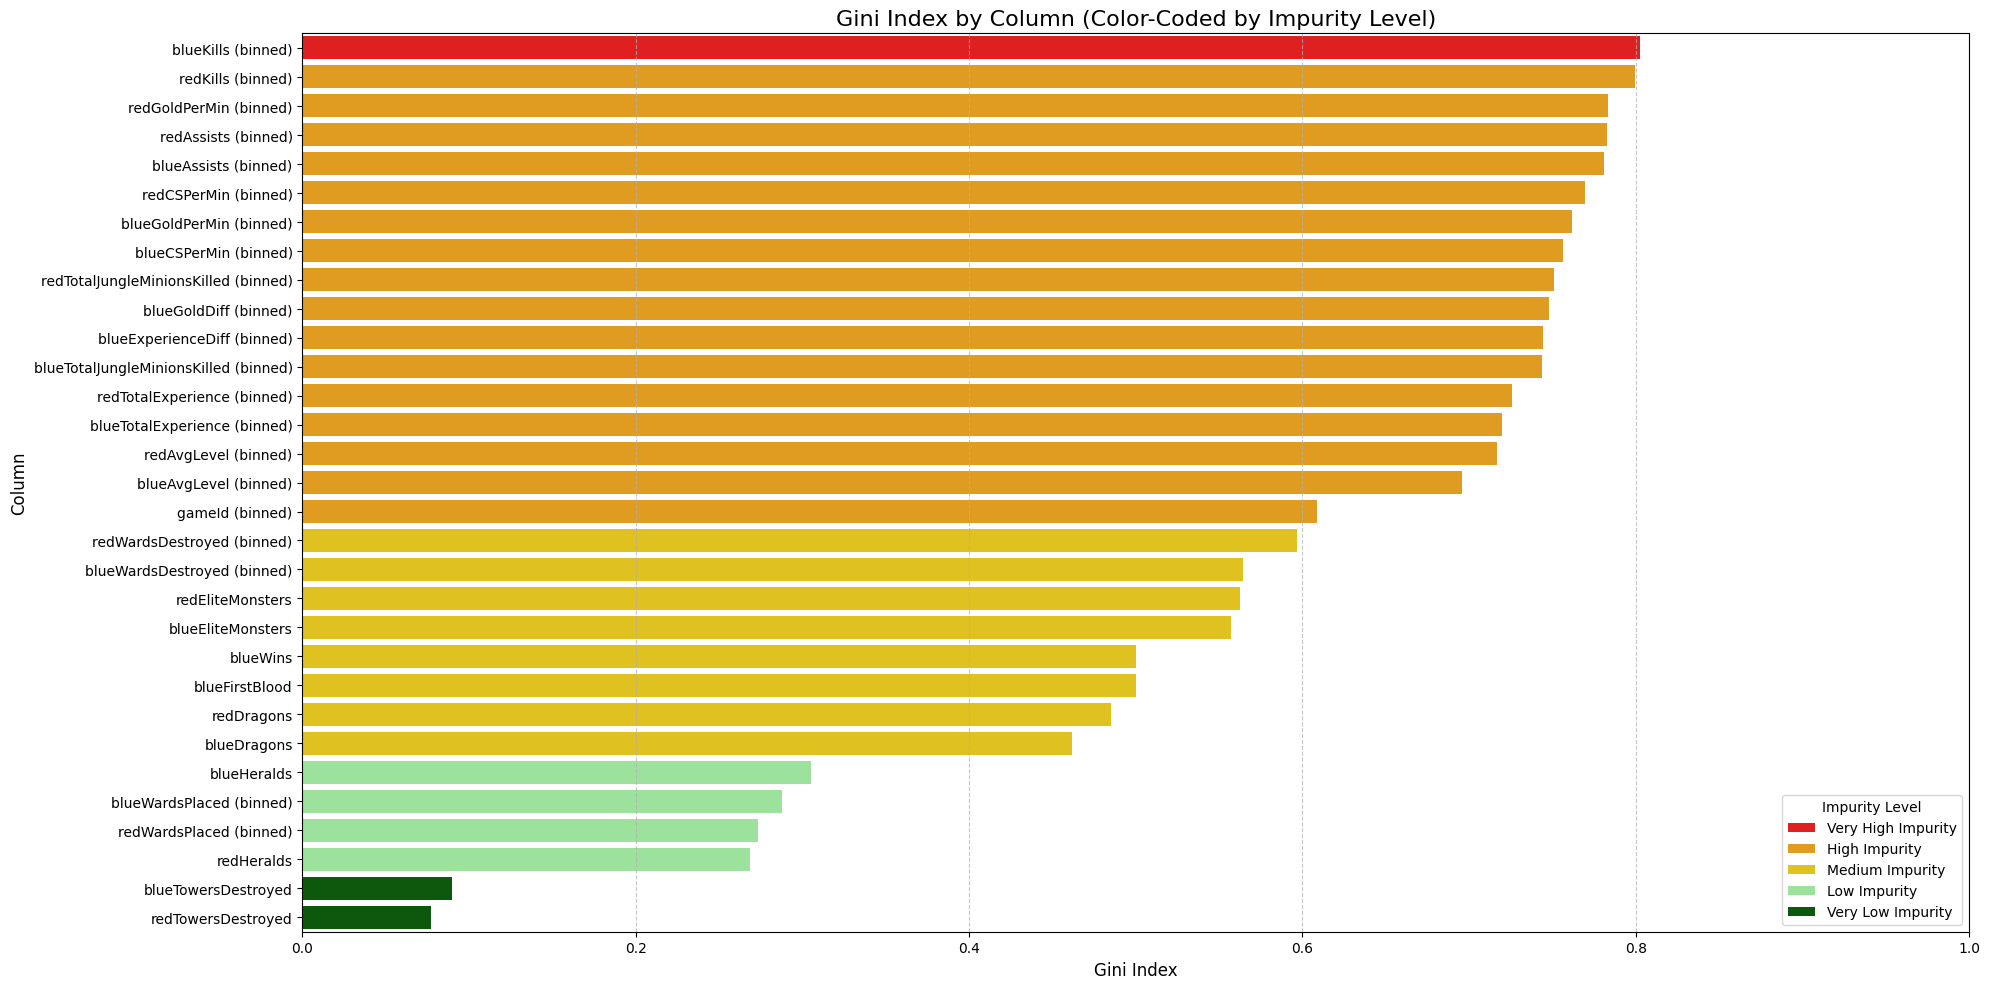

In [13]:
# Store column names and their Gini values
column_names = []
gini_values = []

# Calculate Gini index for each column and store the results
for column in df.columns:
    if df[column].dtype in ['int64', 'float64'] and df[column].nunique() > 10:
        # Create bins for numeric data
        binned_data = pd.cut(df[column].dropna(), bins=10)
        gini_value = calculate_gini(binned_data)
        column_names.append(f"{column} (binned)")
        gini_values.append(gini_value)
    else:
        gini_value = calculate_gini(df[column])
        column_names.append(column)
        gini_values.append(gini_value)

# Create a DataFrame for visualization
gini_df = pd.DataFrame({'Column': column_names, 'Gini Index': gini_values})

# Sort by Gini value to make the chart more readable
gini_df = gini_df.sort_values(by='Gini Index', ascending=False)

# Define impurity categories
def impurity_category(gini):
    if gini < 0.2:
        return "Very Low Impurity"
    elif gini < 0.4:
        return "Low Impurity"
    elif gini < 0.6:
        return "Medium Impurity"
    elif gini < 0.8:
        return "High Impurity"
    else:
        return "Very High Impurity"

gini_df['Impurity Level'] = gini_df['Gini Index'].apply(impurity_category)

# Set color palette based on impurity level
color_map = {
    "Very Low Impurity": "darkgreen",
    "Low Impurity": "lightgreen",
    "Medium Impurity": "gold",
    "High Impurity": "orange",
    "Very High Impurity": "red"
}

# Create the color-coded visualization
plt.figure(figsize=(20, 10))
sns.barplot(x='Gini Index', y='Column', data=gini_df, 
            hue='Impurity Level', palette=color_map, dodge=False)
plt.title('Gini Index by Column (Color-Coded by Impurity Level)', fontsize=16)
plt.xlabel('Gini Index', fontsize=12)
plt.ylabel('Column', fontsize=12)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Impurity Level', loc='lower right')
plt.tight_layout()
plt.show()

## TOP 10 CORELATII + HEATMAP

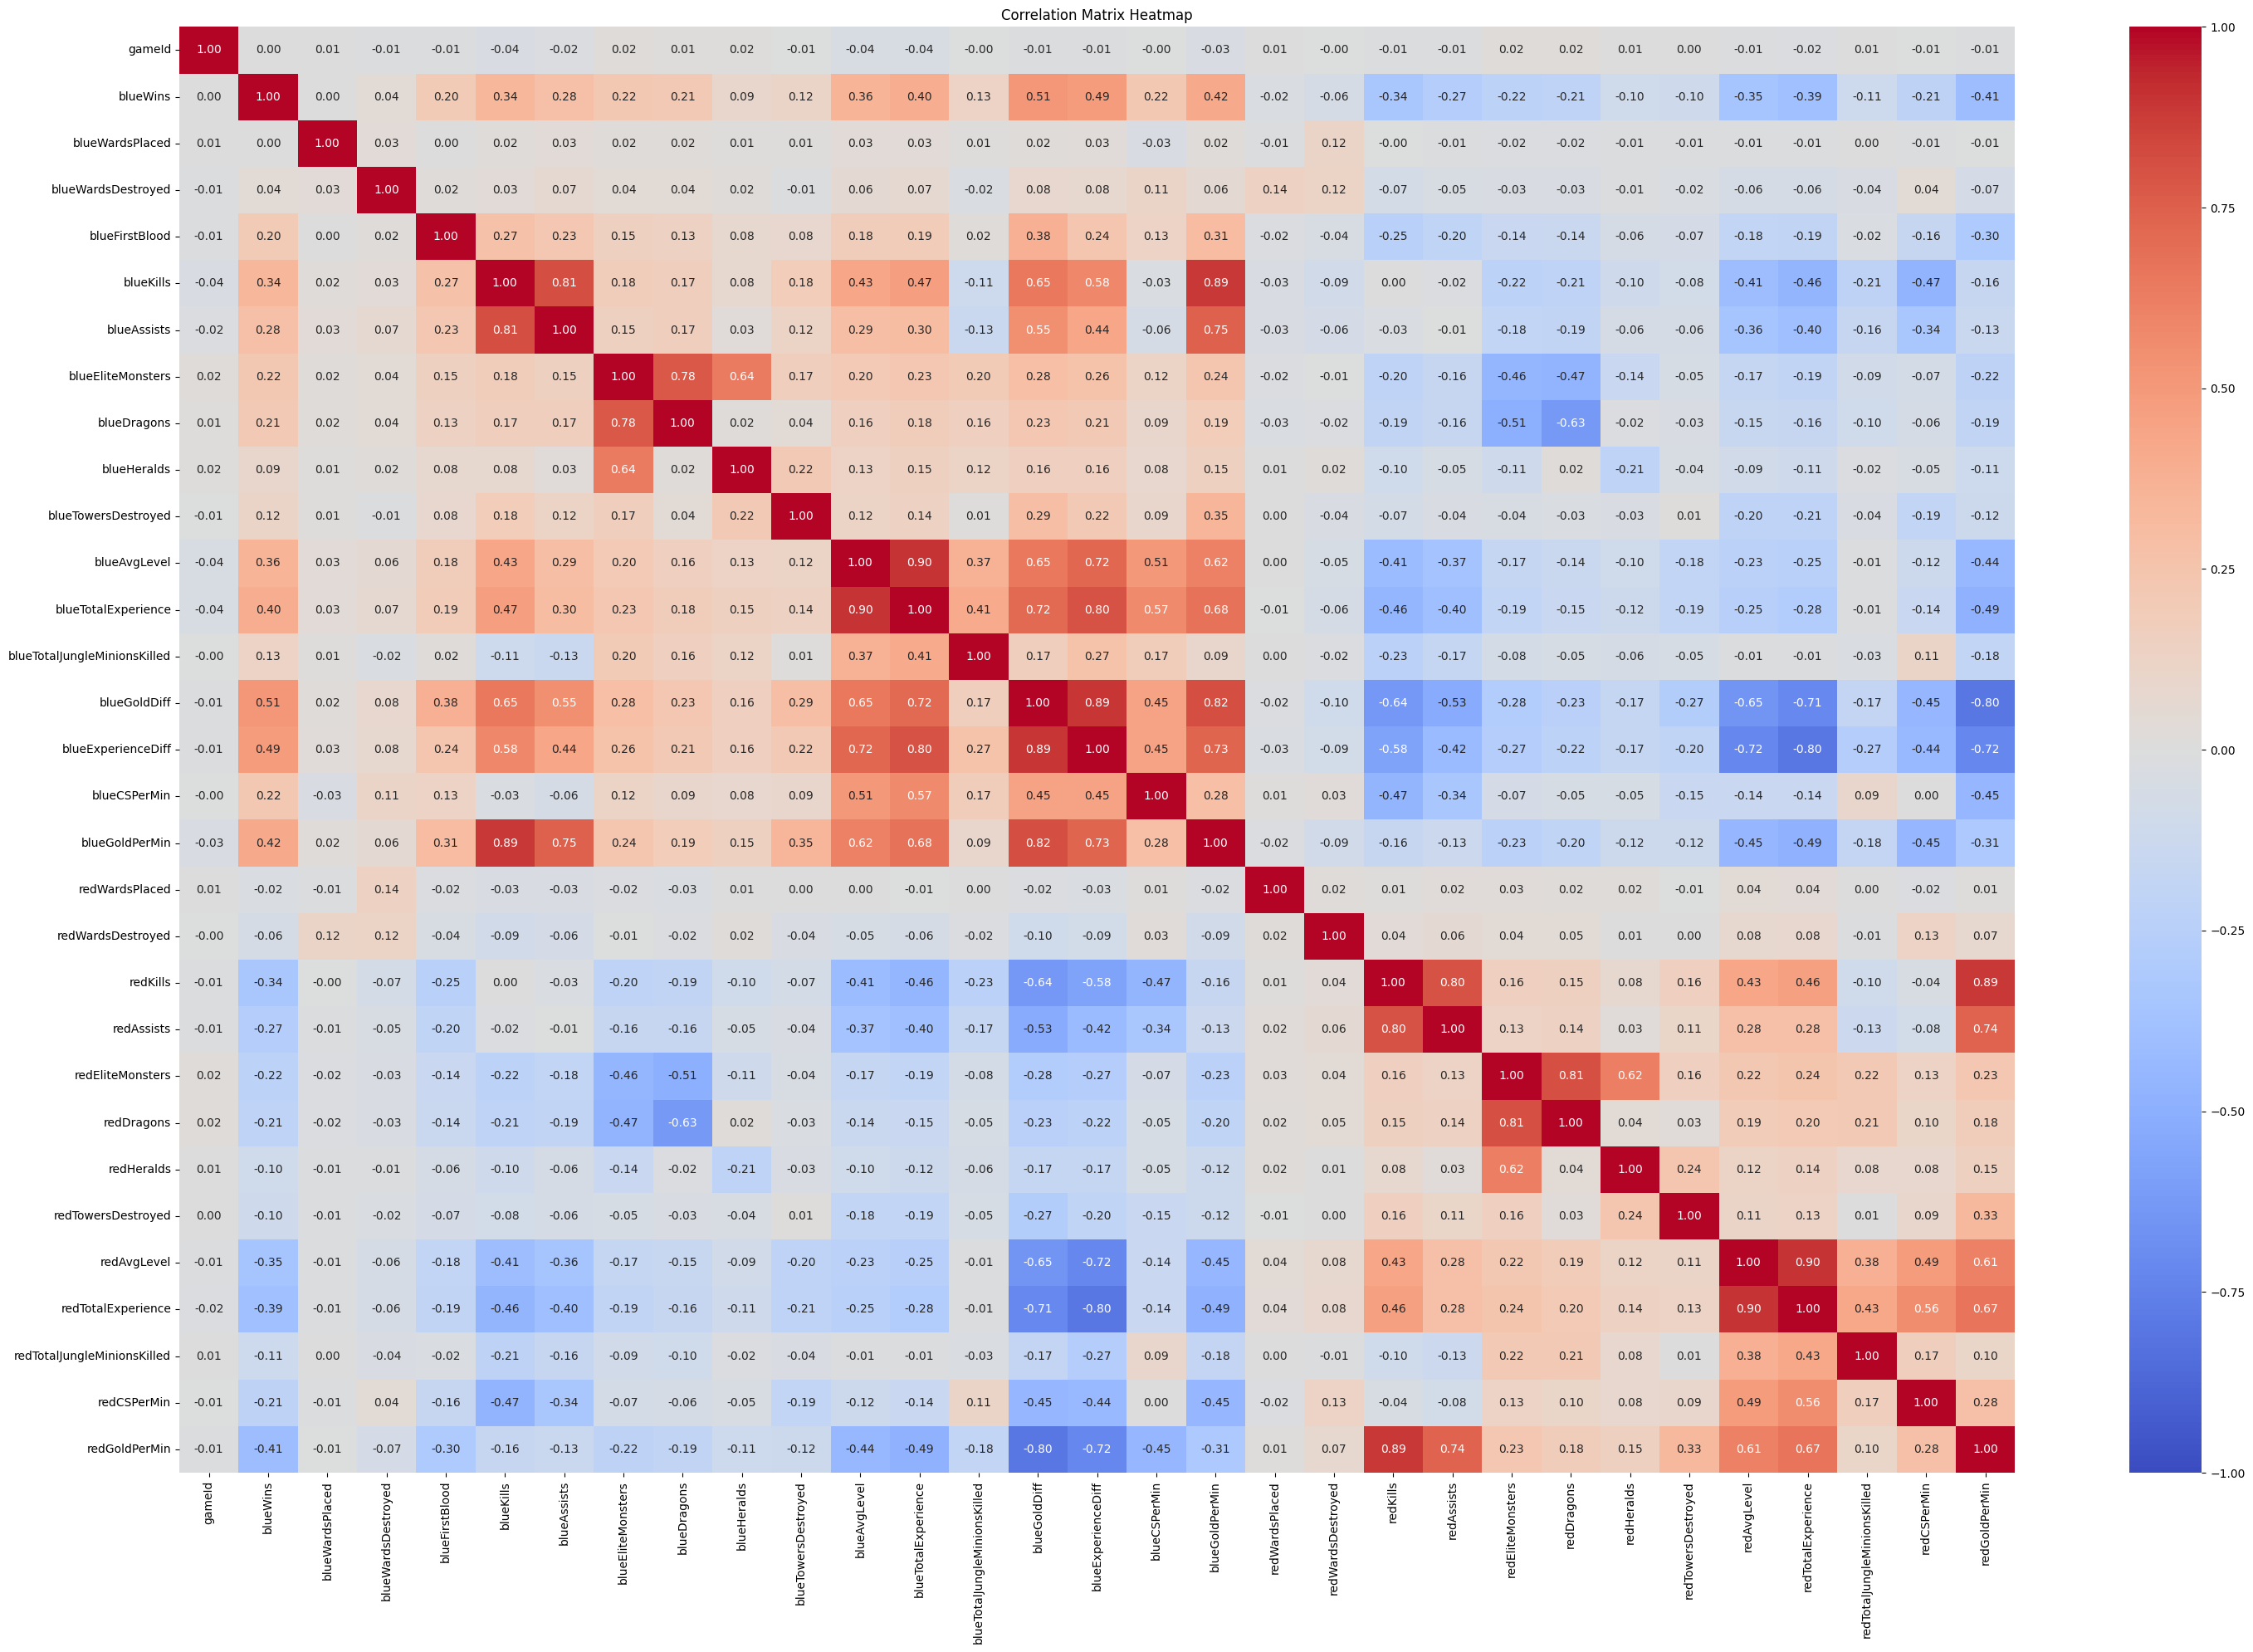


Highest Correlations:
redAvgLevel — redTotalExperience: 0.9017
blueAvgLevel — blueTotalExperience: 0.9013
blueGoldDiff — blueExperienceDiff: 0.8947
blueKills — blueGoldPerMin: 0.8888
redKills — redGoldPerMin: 0.8857
blueGoldDiff — blueGoldPerMin: 0.8168
blueKills — blueAssists: 0.8137
redEliteMonsters — redDragons: 0.8112
blueGoldDiff — redGoldPerMin: -0.8043
redKills — redAssists: 0.8040


In [14]:
# Add this to your notebook to compute and visualize correlations

# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Find highest correlations (excluding self-correlations)
high_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold for "high" correlation
            high_correlations.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], 
                                      correlation_matrix.iloc[i, j]))

# Sort by absolute correlation value
high_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

print("\nHighest Correlations:")
for var1, var2, corr in high_correlations[:10]:  # Show top 10
    print(f"{var1} — {var2}: {corr:.4f}")

Training Random Forest...
Random Forest Accuracy: 0.7272
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       983
           1       0.74      0.71      0.72       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976

--------------------------------------------------
Training Logistic Regression...


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7333
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       983
           1       0.73      0.73      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976

--------------------------------------------------
Training Support Vector Machine...
Support Vector Machine Accuracy: 0.7222
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       983
           1       0.73      0.71      0.72       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

--------------------------------------------------


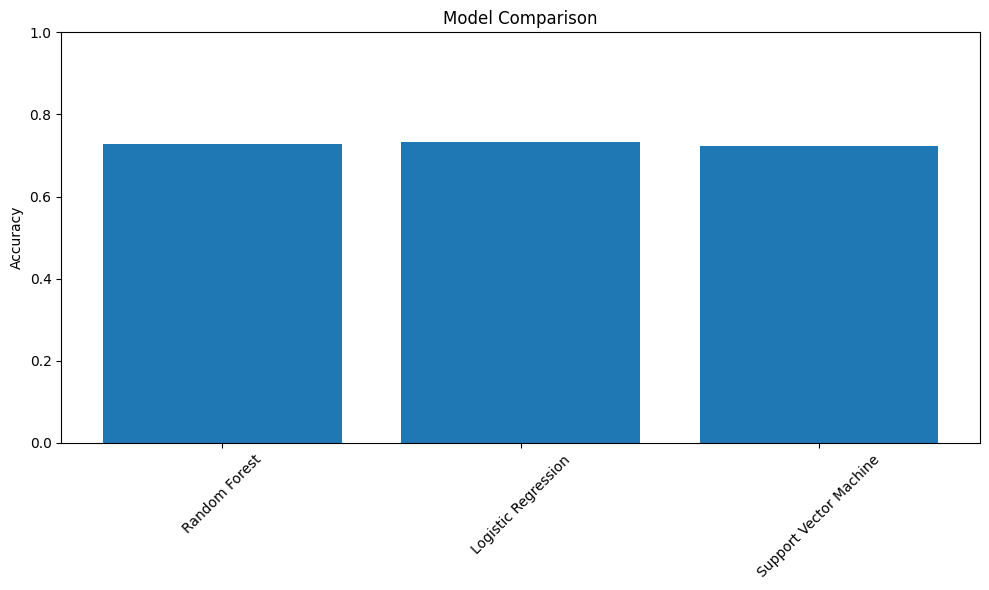

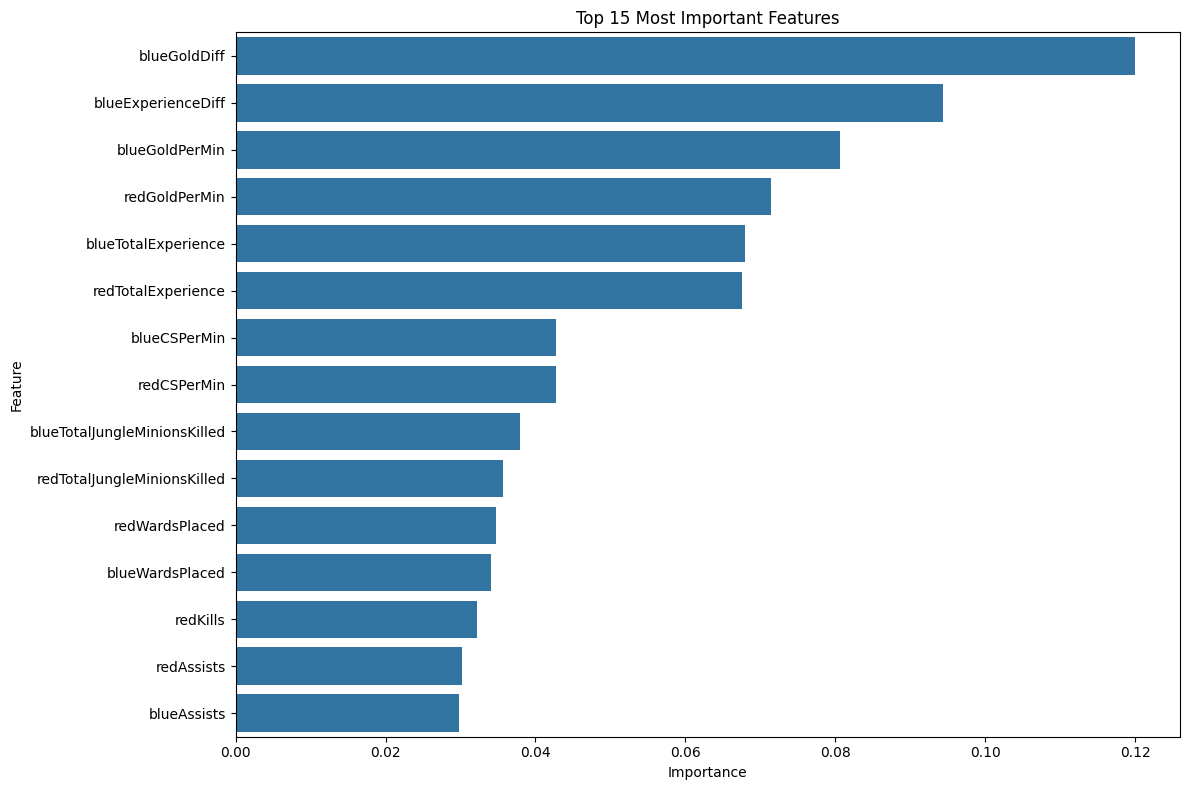

In [15]:
## Train a Machine Learning Model

# 1. Prepare the data
# Choose the target variable (what we want to predict)
y = df['blueWins']  

# Choose features (excluding the target and any ID columns)
X = df.drop(['blueWins', 'gameId'], axis=1)

# 2. Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train multiple models to compare their performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store results
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=10000),
    'Support Vector Machine': SVC(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# 4. Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Feature importance (for Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

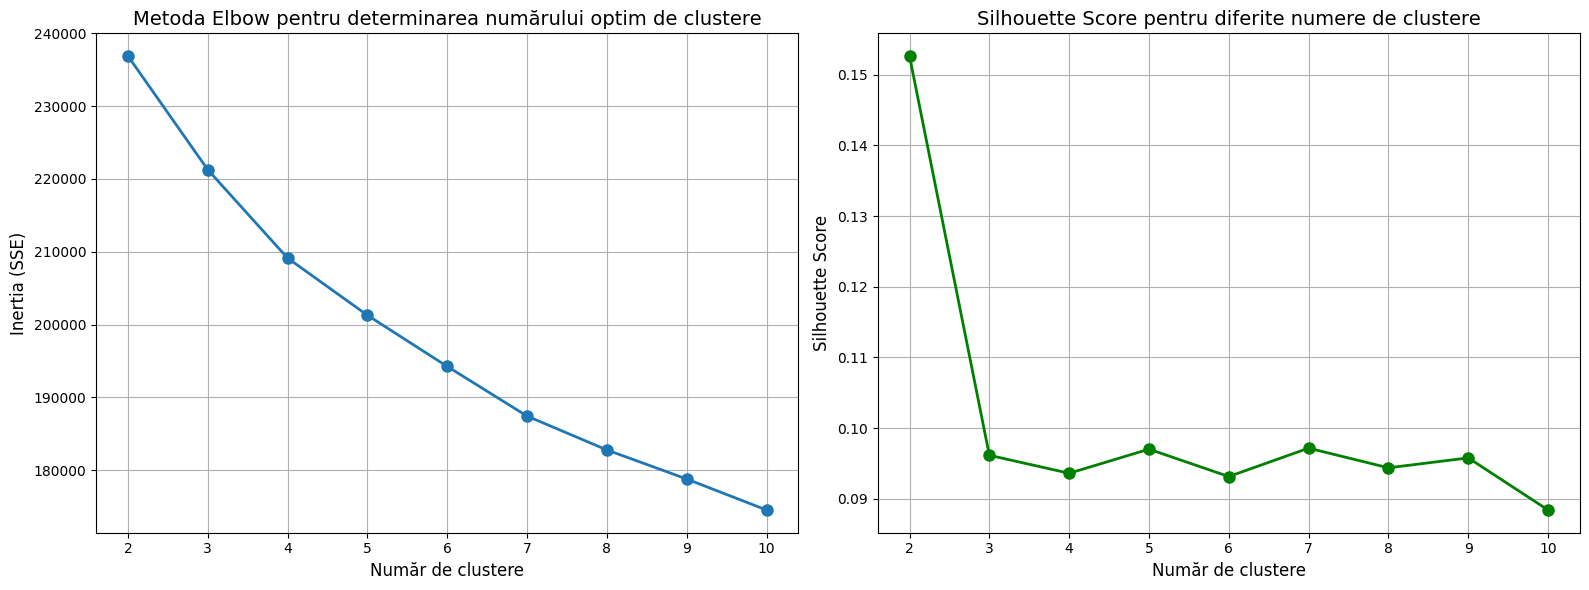

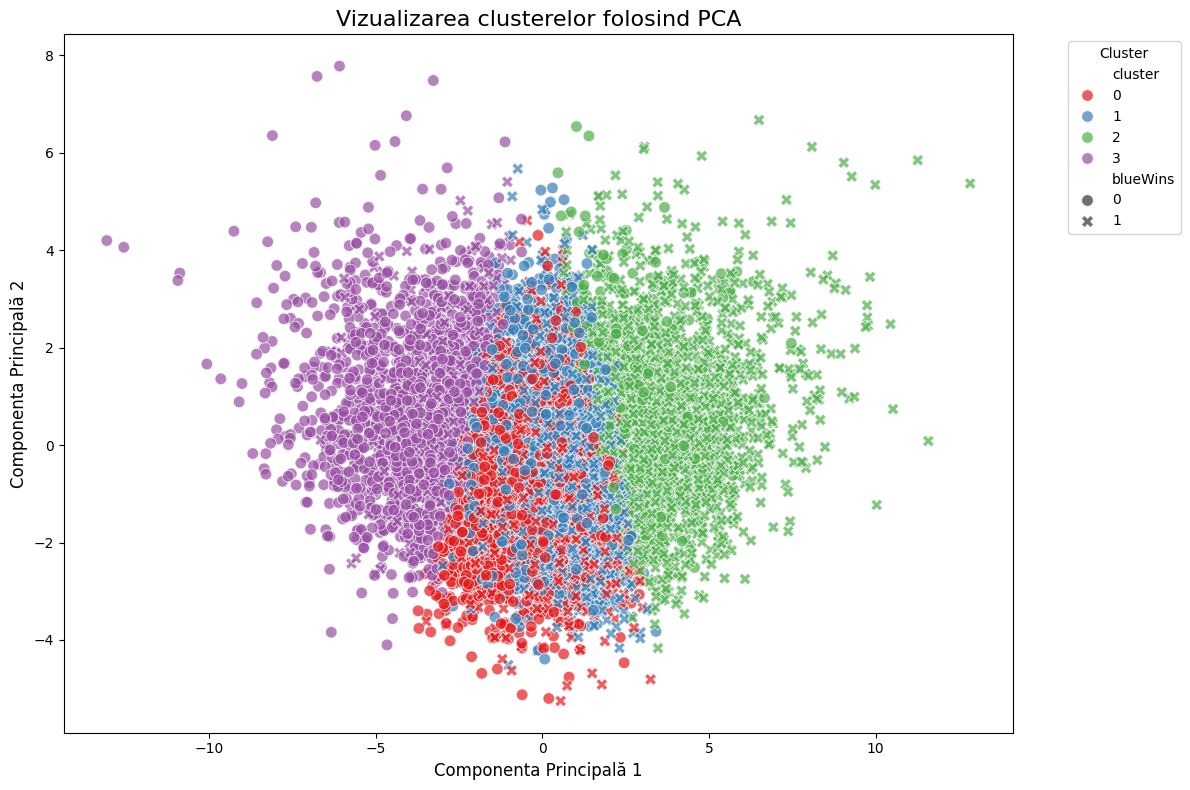


Caracteristicile medii ale fiecărui cluster:
               gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
cluster                                                                
0        4.501198e+09  0.441473        22.355039            2.873256   
1        4.500479e+09  0.521094        22.831246            2.917271   
2        4.498631e+09  0.851538        22.592510            2.934017   
3        4.499682e+09  0.148368        21.050940            2.503462   

         blueFirstBlood  blueKills  blueAssists  blueEliteMonsters  \
cluster                                                              
0              0.481008   5.431395     5.718217           0.200775   
1              0.504614   5.611734     6.081081           0.852999   
2              0.749443   9.444048    10.336603           0.850201   
3              0.264095   4.386251     4.579130           0.207715   

         blueDragons  blueHeralds  ...  redAssists  redEliteMonsters  \
cluster                     

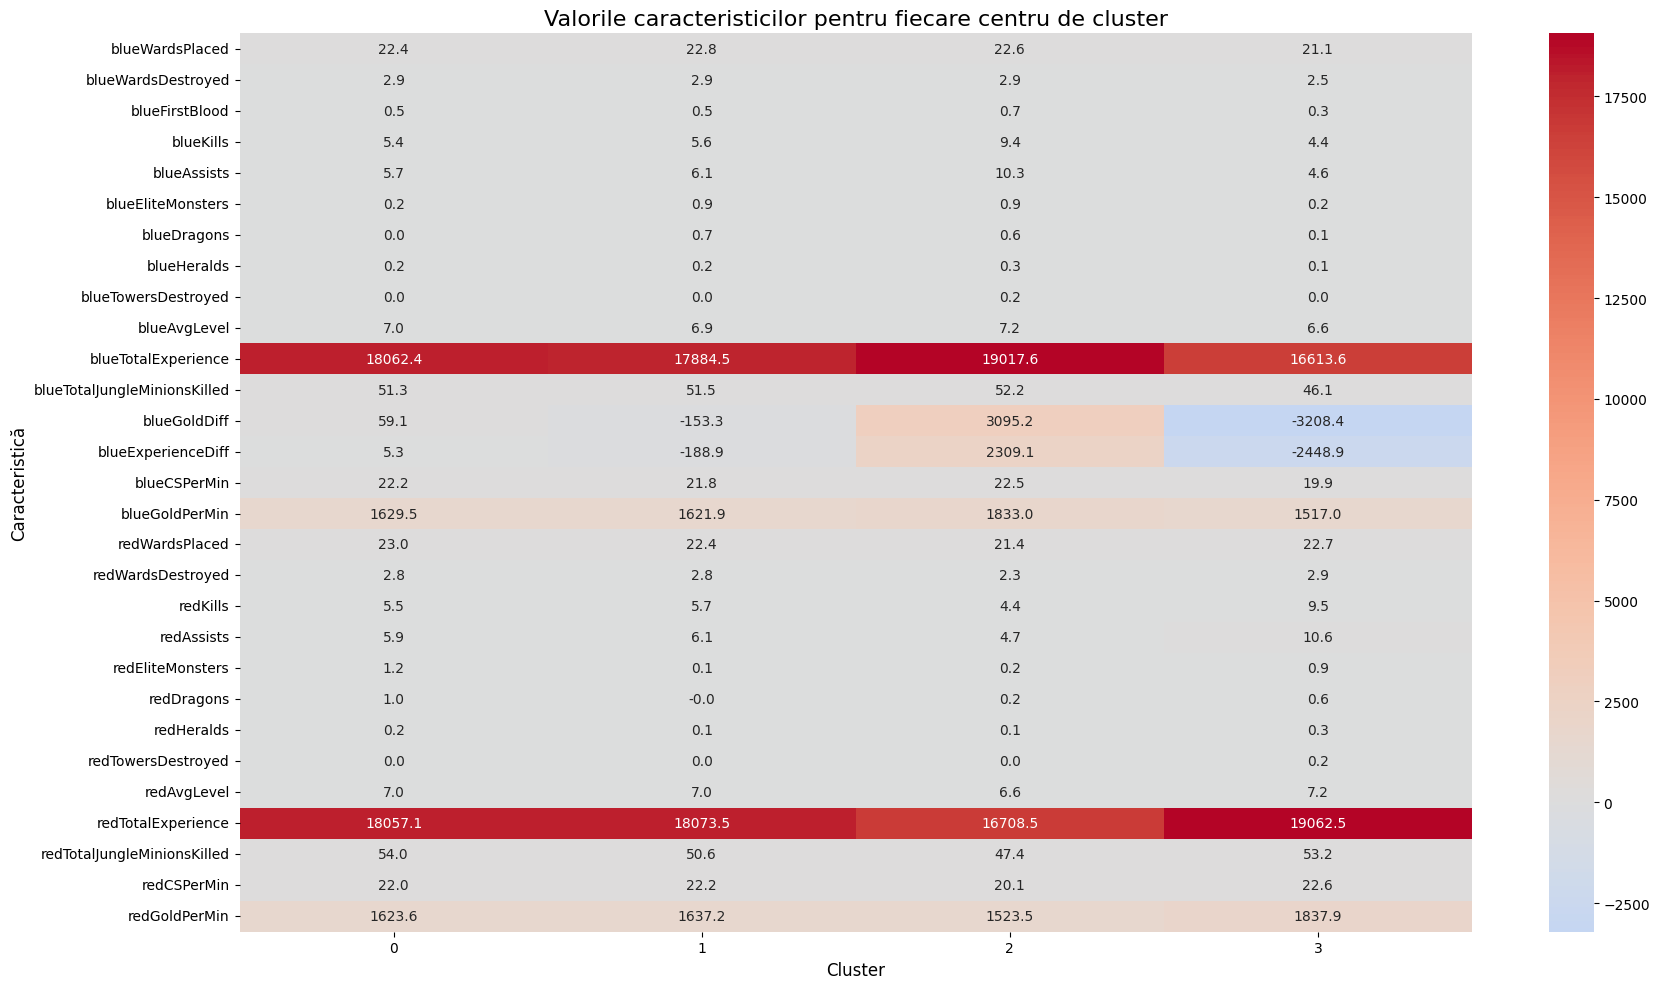

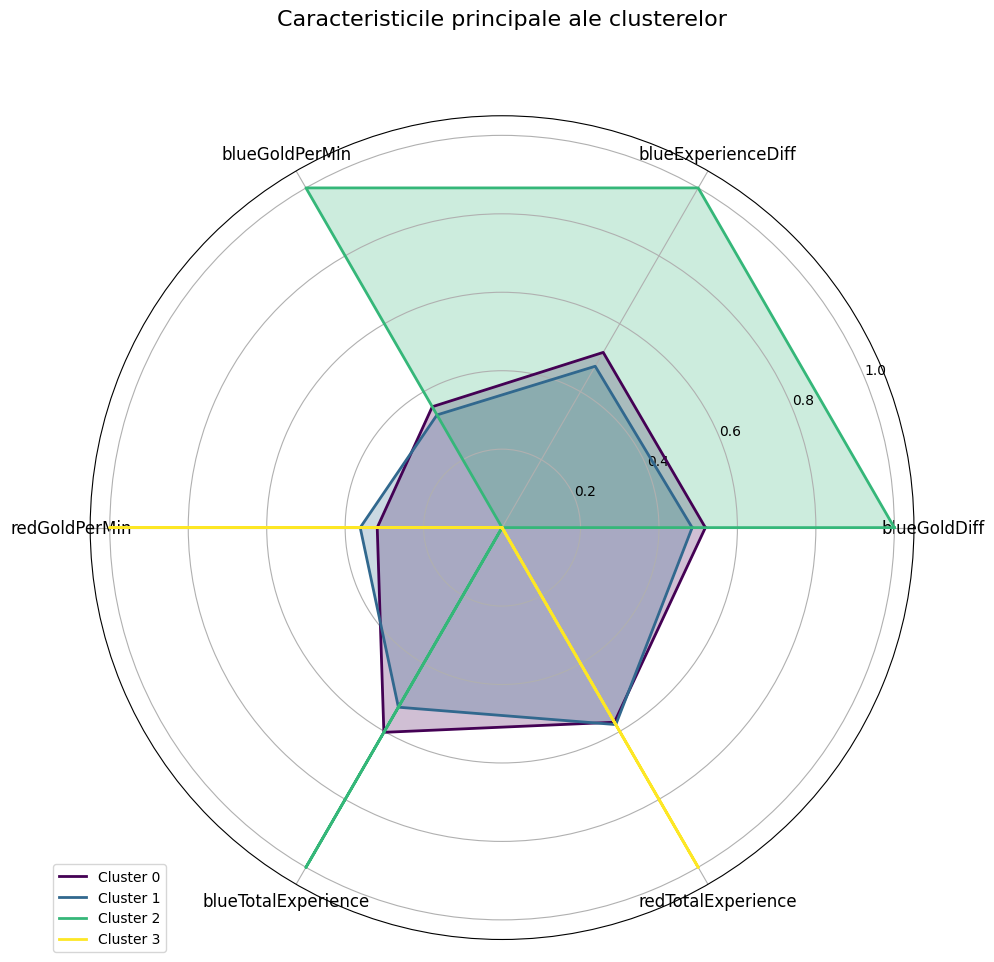

In [16]:
## K-means Clustering

# 1. Scale the features (K-means is sensitive to feature scaling)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Let's use the same features we used for the ML models
X_for_clustering = X.copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_clustering)

# 2. Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Test from 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    if k > 1:  # Silhouette score needs at least 2 clusters
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)

# 3. Visualize the elbow method results
plt.figure(figsize=(16, 6))

# Subplot for the elbow method (inertia)
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', linewidth=2, markersize=8)
plt.grid(True)
plt.xlabel('Număr de clustere', fontsize=12)
plt.ylabel('Inertia (SSE)', fontsize=12)
plt.title('Metoda Elbow pentru determinarea numărului optim de clustere', fontsize=14)
plt.xticks(k_range)

# Subplot for silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', linewidth=2, markersize=8, color='green')
plt.grid(True)
plt.xlabel('Număr de clustere', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score pentru diferite numere de clustere', fontsize=14)
plt.xticks(k_range)

plt.tight_layout()
plt.show()

# 4. Choose the optimal number of clusters based on the plots above
# (You may need to adjust this after seeing the plots)
optimal_k = 4  # This is a starting point, adjust after seeing plots

# 5. Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
df_with_clusters = df.copy()
df_with_clusters['cluster'] = cluster_labels

# 6. Visualize clusters using PCA for dimensionality reduction
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'cluster': cluster_labels,
    'blueWins': df['blueWins']  # To color points by match outcome
})

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='cluster', 
    style='blueWins',
    palette='Set1', 
    data=pca_df,
    s=70,
    alpha=0.7
)
plt.title('Vizualizarea clusterelor folosind PCA', fontsize=16)
plt.xlabel('Componenta Principală 1', fontsize=12)
plt.ylabel('Componenta Principală 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 7. Analyze cluster characteristics
cluster_stats = df_with_clusters.groupby('cluster').mean()
print("\nCaracteristicile medii ale fiecărui cluster:")
print(cluster_stats)

# Let's look at the win rate for blue team in each cluster
win_rate_by_cluster = df_with_clusters.groupby('cluster')['blueWins'].mean()
print("\nRata de câștig pentru echipa albastră în fiecare cluster:")
print(win_rate_by_cluster)

# 8. Find the most influential features for each cluster
# Calculate the cluster centers in the original feature space
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=X_for_clustering.columns
)

# Heatmap of cluster centers
plt.figure(figsize=(18, 10))
sns.heatmap(cluster_centers.T, cmap='coolwarm', center=0, annot=True, fmt=".1f")
plt.title('Valorile caracteristicilor pentru fiecare centru de cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Caracteristică', fontsize=12)
plt.tight_layout()
plt.show()

# 9. Radar chart for better cluster comparison (top features only)
# Select top features based on importance or variance between clusters
feature_importance = feature_importance.sort_values('Importance', ascending=False)
top_features = feature_importance.head(6)['Feature'].values  # Top 6 features

# Prepare data for radar chart
radar_df = cluster_centers[top_features].copy()

# Scale values for radar chart (0 to 1)
for col in radar_df.columns:
    radar_df[col] = (radar_df[col] - radar_df[col].min()) / (radar_df[col].max() - radar_df[col].min())

# Create radar chart
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_chart(ax, angles, values, color, label):
    # Duplicate first value to close the loop
    values = np.append(values, values[0])
    
    # Draw the plot
    ax.plot(angles, values, color=color, linewidth=2, label=label)
    ax.fill(angles, values, color=color, alpha=0.25)
    
# Set up angles for radar chart
N = len(top_features)
angles = [n / N * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Duplicate first angle to close the loop

# Create figure
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot each cluster
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
    values = radar_df.iloc[i].values
    radar_chart(ax, angles, values, colors[i], f'Cluster {i}')

# Set the labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(top_features, fontsize=12)
ax.set_title('Caracteristicile principale ale clusterelor', y=1.1, fontsize=16)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()


## Componenta Principală 1 (PCA1):

Reprezintă direcția de varianță maximă în datele originale
Este o combinație liniară a tuturor caracteristicilor inițiale (statistici din joc)
În contextul datelor de League of Legends, probabil reprezintă diferența generală de performanță între echipe (diferențe de aur, experiență, ucideri etc.)
Valori mari pozitive sau negative indică meciuri cu diferențe semnificative între echipe

## Componenta Principală 2 (PCA2):

Este a doua direcție de varianță maximă, perpendiculară pe prima
Captează un alt aspect al datelor care nu este corelat cu prima componentă
În contextul acestui joc, ar putea reprezenta stilul de joc sau strategia


Rata de câștig pentru echipa albastră în fiecare cluster:
cluster
0    0.441473
1    0.521094
2    0.851538
3    0.148368
Name: blueWins, dtype: float64


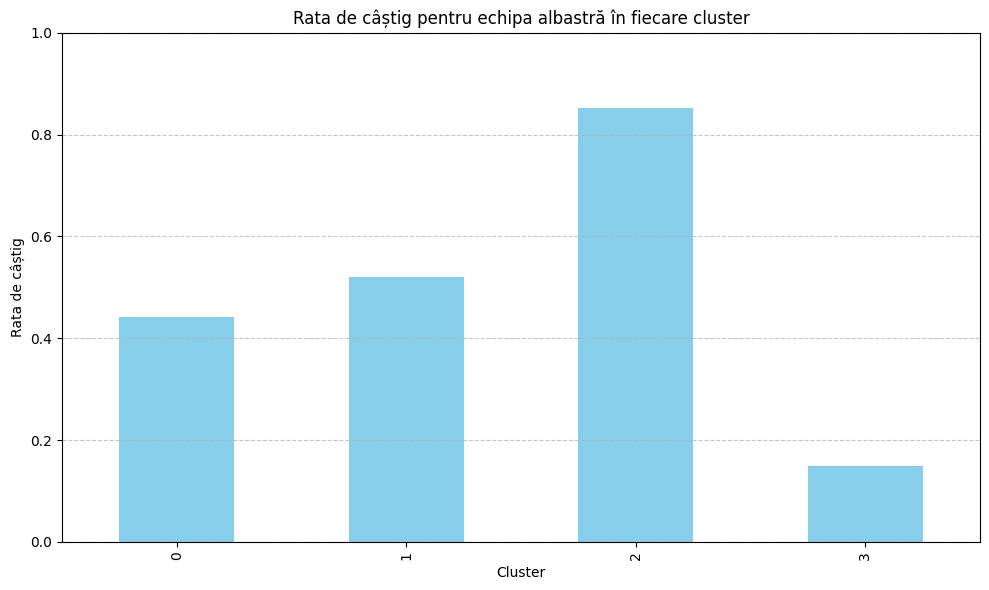

In [17]:
win_rate_by_cluster = df_with_clusters.groupby('cluster')['blueWins'].mean()
print("\nRata de câștig pentru echipa albastră în fiecare cluster:")
print(win_rate_by_cluster)

# Visualize win rates by cluster
plt.figure(figsize=(10, 6))
win_rate_by_cluster.plot(kind='bar', color='skyblue')
plt.title('Rata de câștig pentru echipa albastră în fiecare cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata de câștig')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Cluster 2 cu dominație Blue Team: Meciuri unde echipa albastră are avantaje semnificative (mai mult aur, experiență, ucideri)

Cluster 3 cu dominație Red Team: Meciuri unde echipa roșie are avantaje clare

Cluster 0 de meciuri echilibrate: Meciuri strânse cu diferențe mici între echipe

Cluster 1 cu stil specific de joc: Posibil meciuri cu focus pe farming vs. focus pe agresivitate

Performing hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- Random Forest Model Evaluation ---
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 19, 'n_estimators': 181}
Accuracy: 0.7257

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       983
           1       0.73      0.72      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



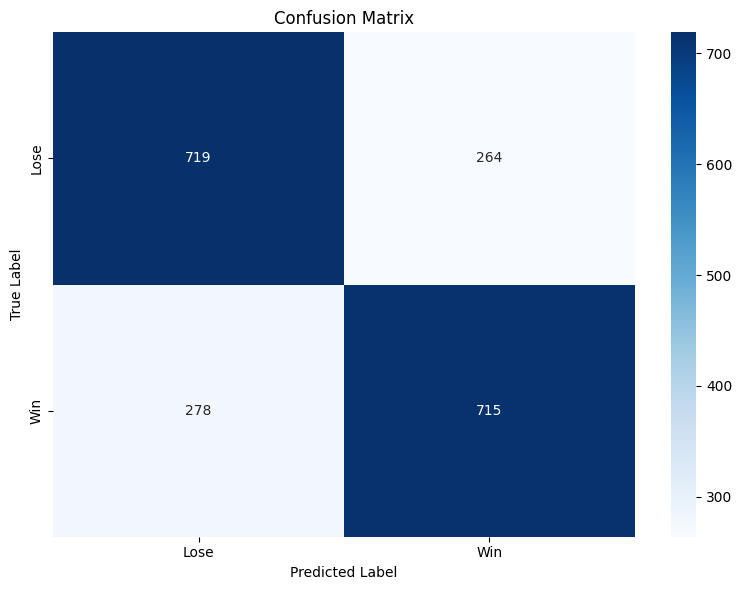

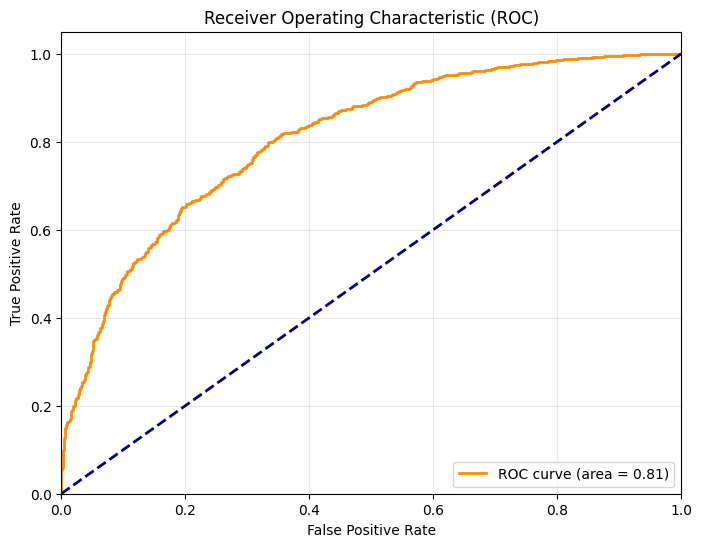

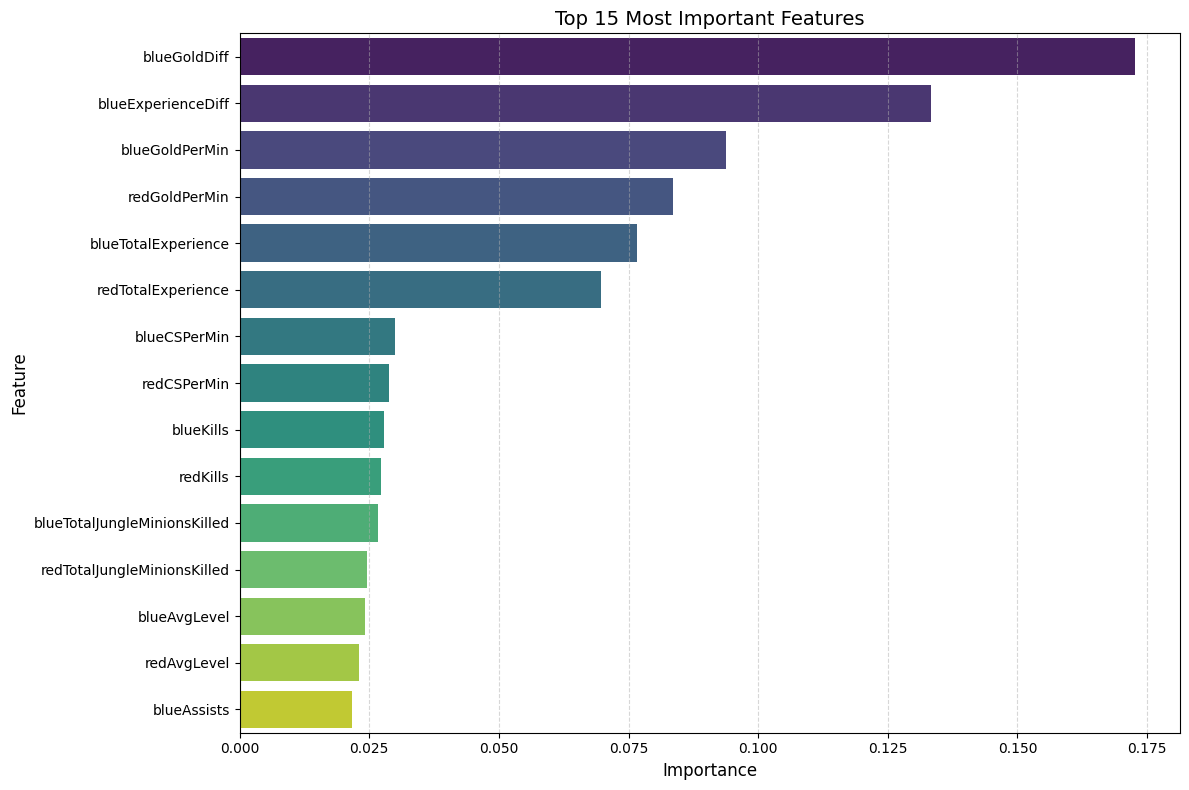


Calculating permutation importance (this may take a while)...


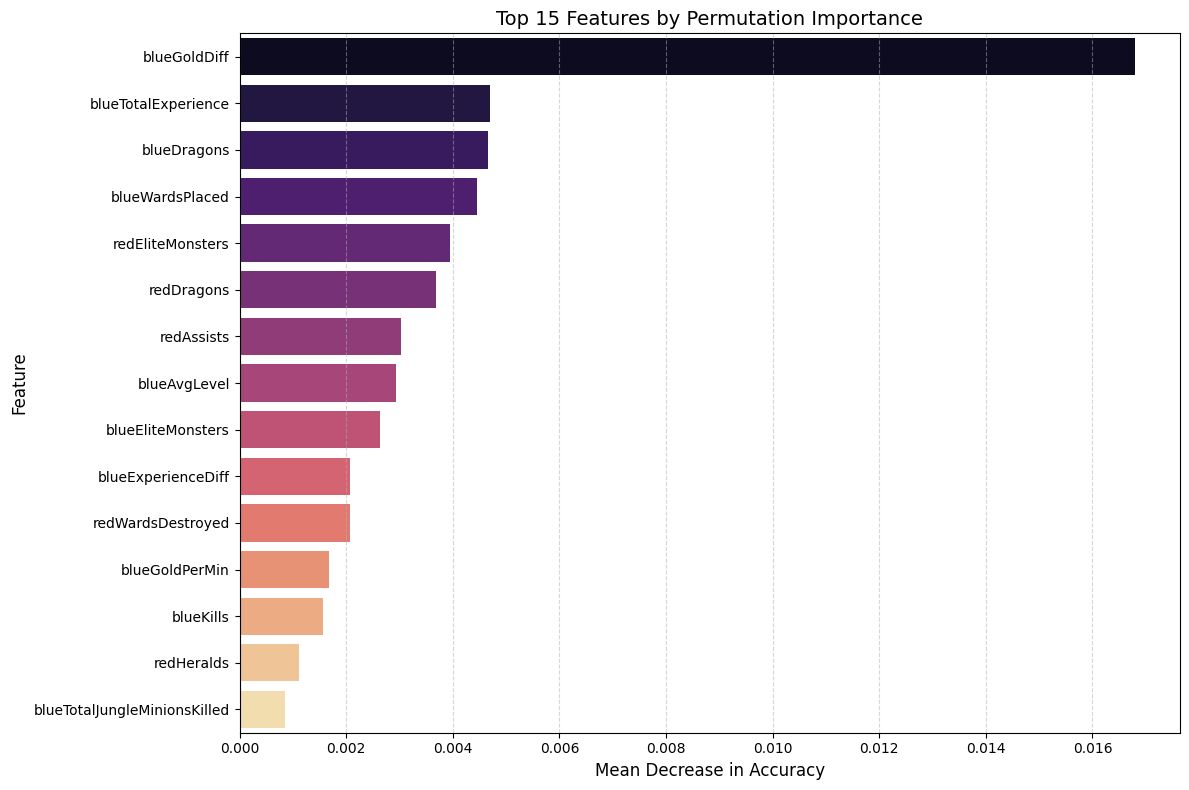

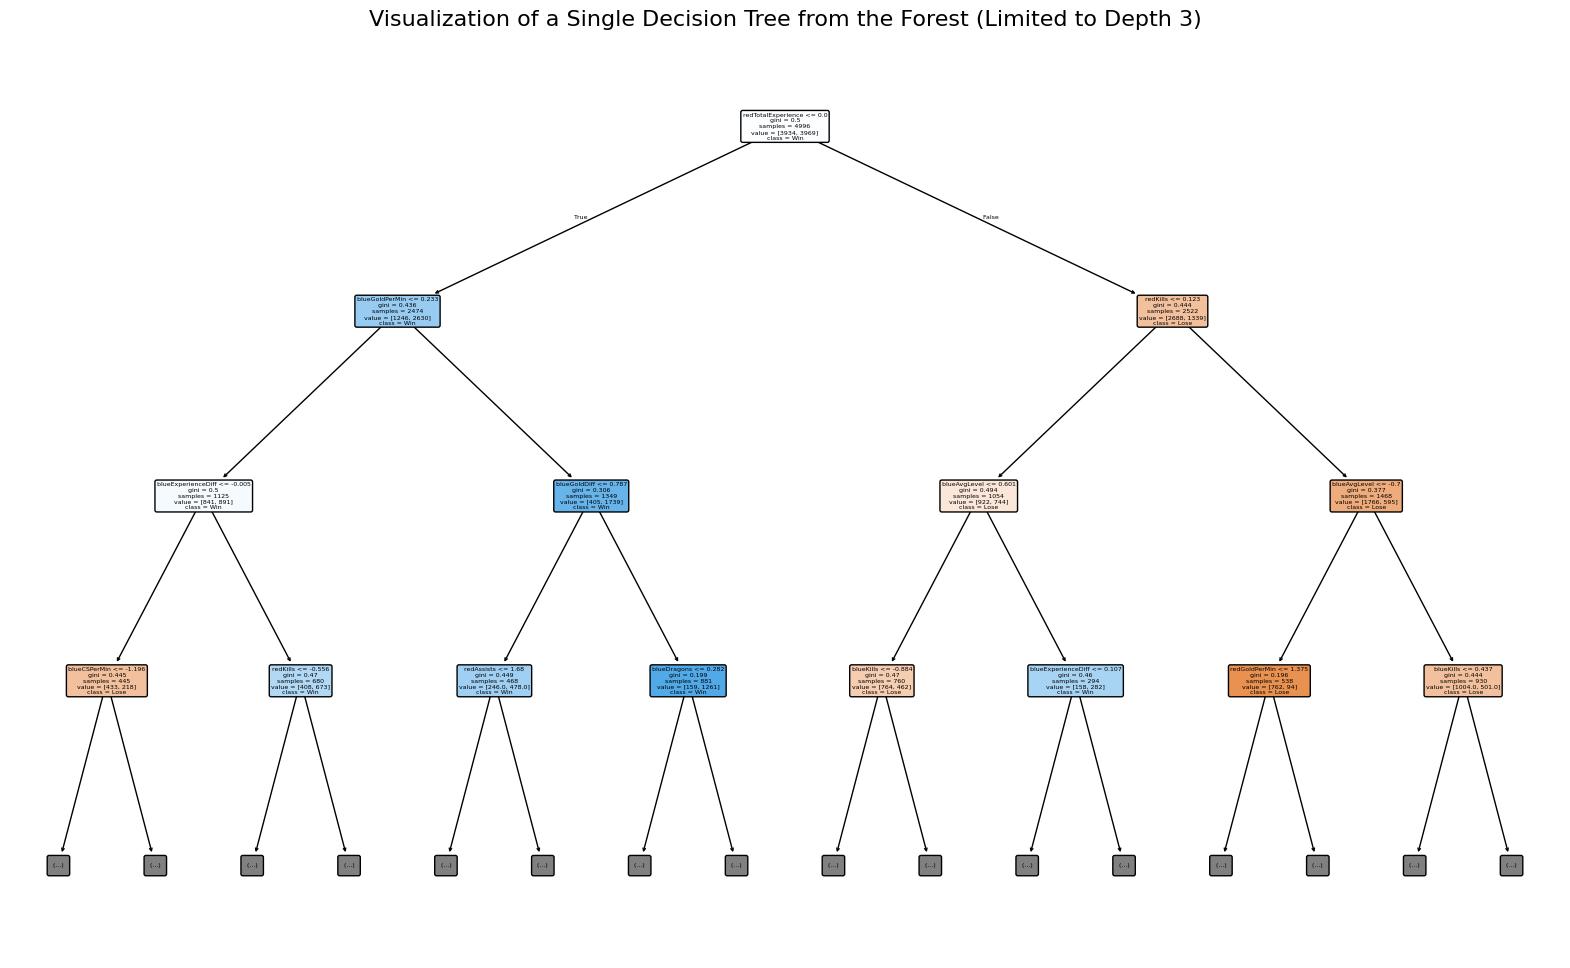

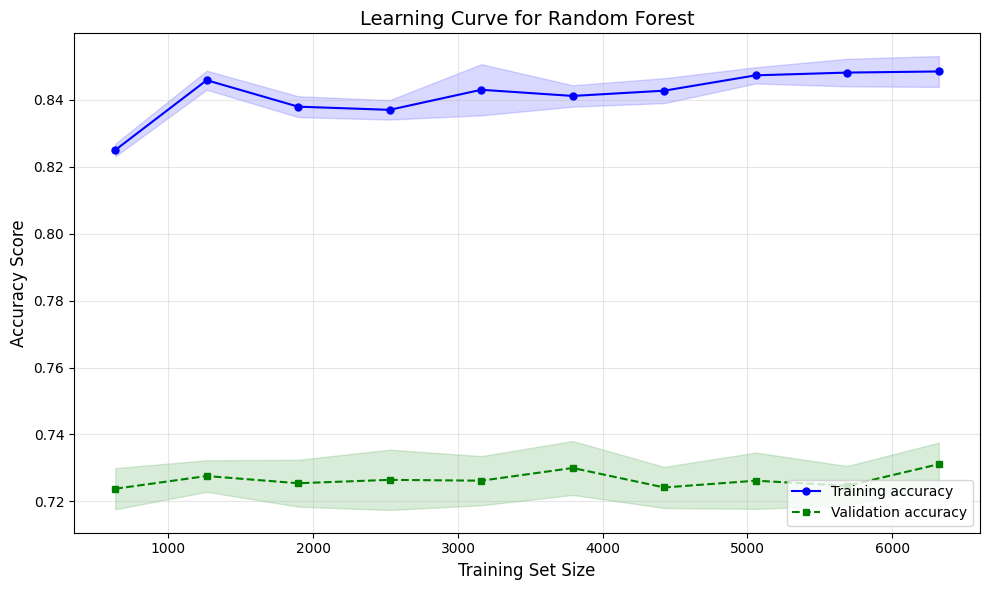

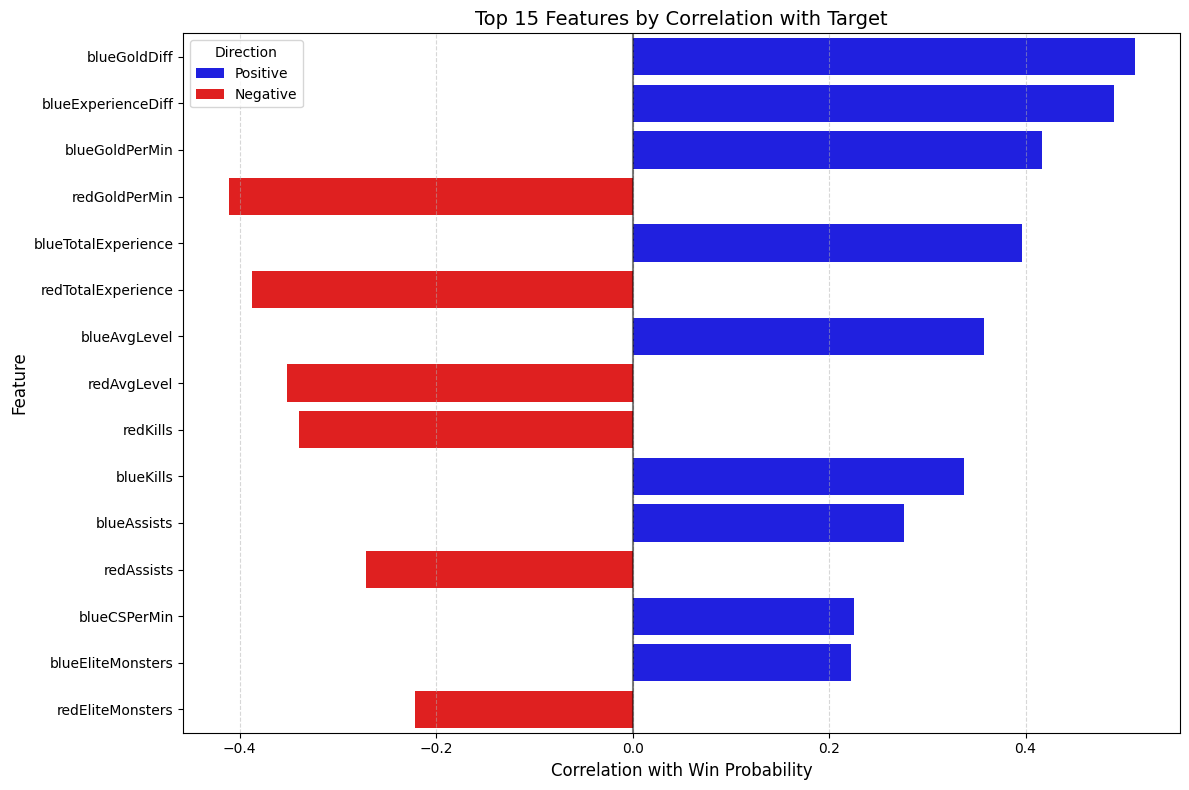

Random Forest analysis complete!


In [18]:
# Random Forest Comprehensive Analysis (without SHAP dependency)

# ...existing code...
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance, partial_dependence
# Remove plot_partial_dependence and import PartialDependenceDisplay instead
from sklearn.inspection import PartialDependenceDisplay
from scipy.stats import randint
# ...existing code...

# 2. Prepare the data
# Use the same feature set you used for K-means
y = df['blueWins']
X = df.drop(['blueWins', 'gameId'], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (optional for Random Forest, but can sometimes help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Hyperparameter tuning
print("Performing hyperparameter tuning for Random Forest...")

# Option 1: Quick random search for hyperparameters
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

rf_random.fit(X_train_scaled, y_train)
best_rf = rf_random.best_estimator_

# 4. Evaluate the model
y_pred = best_rf.predict(X_test_scaled)
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

print("\n--- Random Forest Model Evaluation ---")
print(f"Best parameters: {rf_random.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Lose', 'Win'], 
            yticklabels=['Lose', 'Win'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# 6. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# 7. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance.head(15), palette='viridis', legend=False)
plt.title('Top 15 Most Important Features', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 8. Permutation importance (more reliable than built-in feature importance)
print("\nCalculating permutation importance (this may take a while)...")
perm_importance = permutation_importance(best_rf, X_test_scaled, y_test, n_repeats=10,
                                         random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]
perm_importance_df = pd.DataFrame({
    'Feature': X.columns[sorted_idx][:15],
    'Permutation Importance': perm_importance.importances_mean[sorted_idx][:15]
})

plt.figure(figsize=(12, 8))
sns.barplot(x='Permutation Importance', y='Feature', hue='Feature', data=perm_importance_df, palette='magma', legend=False)
plt.title('Top 15 Features by Permutation Importance', fontsize=14)
plt.xlabel('Mean Decrease in Accuracy', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 9. Visualize a single decision tree from the forest
plt.figure(figsize=(20, 12))
from sklearn.tree import plot_tree
plot_tree(best_rf.estimators_[0], max_depth=3, filled=True, 
          feature_names=X.columns, class_names=['Lose', 'Win'], rounded=True)
plt.title('Visualization of a Single Decision Tree from the Forest (Limited to Depth 3)', fontsize=16)
plt.show()

# 10. Learning Curve - shows how model performance changes with more training data
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train_scaled, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, 
         label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, 
         label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Learning Curve for Random Forest', fontsize=14)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 13. Feature Correlation Analysis (as additional insight)
# Calculate correlation between features and target
feature_corrs = []
for col in X.columns:
    corr = np.corrcoef(X[col], y)[0, 1]
    feature_corrs.append((col, corr, abs(corr)))

# Sort by absolute correlation
feature_corrs.sort(key=lambda x: x[2], reverse=True)
corr_df = pd.DataFrame(feature_corrs, columns=['Feature', 'Correlation', 'Abs_Correlation'])

# Plot top 15 correlations
plt.figure(figsize=(12, 8))
corr_df_temp = corr_df.head(15).copy()
corr_df_temp['Direction'] = ['Negative' if c < 0 else 'Positive' for c in corr_df_temp['Correlation']]
sns.barplot(x='Correlation', y='Feature', hue='Direction', data=corr_df_temp, 
           palette={'Positive': 'blue', 'Negative': 'red'})
plt.title('Top 15 Features by Correlation with Target', fontsize=14)
plt.xlabel('Correlation with Win Probability', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

print("Random Forest analysis complete!")

Curba ROC este o reprezentare grafică care ilustrează performanța unui model de clasificare binară la diferite praguri de clasificare.

#### Ce reprezintă curba ROC?
- Axa X: Rata Rezultatelor Fals Pozitive (FPR) - proporția cazurilor negative clasificate incorect ca pozitive
- Axa Y: Rata Rezultatelor Real Pozitive (TPR sau sensibilitate) - proporția cazurilor pozitive clasificate corect

#### Cum se interpretează?
- Un model perfect ar avea o curbă care trece prin colțul stânga sus (FPR = 0, TPR = 1)
- Linia diagonală punctată reprezintă un clasificator aleatoriu (fără valoare predictivă)
- Cu cât curba este mai aproape de colțul stânga sus, cu atât modelul este mai bun
- AUC (Area Under the Curve) = reprezintă probabilitatea ca modelul să clasifice un exemplu pozitiv ales aleator mai sus decât un exemplu negativ ales aleator

#### De ce este utilă?
- Permite evaluarea modelului indiferent de pragul de clasificare ales
- Oferă o măsură unică de performanță (AUC) pentru compararea modelelor
- Arată compromisul între sensibilitate și specificitate la diferite praguri

În cazul nostru, AUC de indică un model foarte bun la clasificarea meciurilor câștigate de echipa albastră.

In [19]:
# Enhanced RandomForest hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform

# Expanded parameter grid with more options
param_dist = {
    'n_estimators': randint(100, 500),  # Wider range
    'max_depth': [None] + list(range(5, 41, 5)),  # More depth options
    'min_samples_split': randint(2, 30),
    'min_samples_leaf': randint(1, 15),
    'max_features': ['sqrt', 'log2', None, 0.7, 0.8],  # Add ratio options
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]  # Handle class imbalance
}

# Better cross-validation strategy - maintains class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use a better metric for potentially imbalanced data
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Increased from 20 to 50
    cv=cv,
    verbose=1,
    n_jobs=-1,
    scoring='roc_auc',  # Better than accuracy for imbalanced data
    random_state=42,
    return_train_score=True  # Important for diagnosing overfitting
)

In [20]:
# Phase 1: Broad search (run this first)
rf_random.fit(X_train_scaled, y_train)
best_params = rf_random.best_params_
print(f"Best parameters from phase 1: {best_params}")

# Phase 2: Fine-tuning around best parameters
# Example for n_estimators
fine_param_dist = {
    'n_estimators': randint(max(best_params['n_estimators'] - 50, 50), 
                           best_params['n_estimators'] + 50),
    'max_depth': [best_params['max_depth'] - 2, best_params['max_depth'], 
                 best_params['max_depth'] + 2] if best_params['max_depth'] else [None, 5, 10],
    'min_samples_split': randint(max(best_params['min_samples_split'] - 2, 2), 
                               best_params['min_samples_split'] + 3),
    'min_samples_leaf': randint(max(best_params['min_samples_leaf'] - 2, 1), 
                              best_params['min_samples_leaf'] + 3),
    'max_features': [best_params['max_features']],  # Keep best value
    'bootstrap': [best_params['bootstrap']],
    'class_weight': [best_params['class_weight']]
}

rf_random_fine = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=fine_param_dist,
    n_iter=30,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    scoring='roc_auc',
    random_state=42
)

rf_random_fine.fit(X_train_scaled, y_train)
best_rf = rf_random_fine.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters from phase 1: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 23, 'n_estimators': 442}
Fitting 5 folds for each of 30 candidates, totalling 150 fits


### n_estimators (100-500):
 Reprezintă numărul de arbori decizionali din pădure. Pentru datele tale din League of Legends, un număr mai mare de arbori poate capta mai bine modelele complexe din statisticile jocului (diferențele de aur, ucideri, etc.). Valori mai mari îmbunătățesc precizia, dar cresc timpul de execuție.

### max_depth (None sau 5-40):
 Adâncimea maximă a fiecărui arbore. Când este None, arborele crește până când fiecare nod conține doar un singur exemplu sau toate exemplele din nod au aceeași clasă. Pentru datele de LoL, acest parametru ajută la controlul complexității și evită overfitting-ul care ar putea apărea dacă modelul memorează specific meciuri particulare.

### min_samples_split (2-30): 
Numărul minim de exemple necesare pentru a diviza un nod intern. Valori mai mari previn crearea de ramificații bazate pe prea puține exemple, reducând riscul de overfitting pentru meciurile cu caracteristici neobișnuite.

### min_samples_leaf (1-15):
 Numărul minim de exemple necesare într-un nod frunză. Similar cu parametrul anterior, ajută la prevenirea overfitting-ului, asigurând că fiecare decizie finală este bazată pe suficiente exemple.

### max_features ('sqrt', 'log2', None, 0.7, 0.8):
 Numărul de caracteristici considerate pentru cea mai bună divizare. Pentru datele tale de LoL, opțiuni precum 0.7 sau 0.8 permit modelului să considere majoritatea caracteristicilor relevante pentru joc în fiecare decizie.

### bootstrap (True/False):
 Determină dacă se folosesc eșantioane bootstrap (cu înlocuire) pentru construirea arborilor. Cu False, fiecare arbore utilizează întregul set de date pentru antrenare, ceea ce poate fi benefic pentru a capta modele specifice în datele de joc.

### class_weight ('balanced', 'balanced_subsample', None):
 Atribuie ponderi claselor pentru a gestiona dezechilibrul. Dacă victoriia echipei albastre sunt dezechilibrate în setul tău de date (de exemplu, câștigă mai des sau mai rar), acest parametru corectează acea tendință.


Testing clustering with StandardScaler
K=2, init=k-means++, n_init=10, Silhouette=0.1527
K=2, init=k-means++, n_init=20, Silhouette=0.1527
K=3, init=k-means++, n_init=10, Silhouette=0.0962
K=4, init=k-means++, n_init=10, Silhouette=0.0936
K=4, init=k-means++, n_init=20, Silhouette=0.0937
K=4, init=k-means++, n_init=50, Silhouette=0.0937
K=4, init=random, n_init=10, Silhouette=0.0937
K=5, init=k-means++, n_init=10, Silhouette=0.0970
K=6, init=k-means++, n_init=10, Silhouette=0.0931
K=6, init=k-means++, n_init=20, Silhouette=0.0934
K=6, init=random, n_init=10, Silhouette=0.0996
K=7, init=k-means++, n_init=10, Silhouette=0.0972
K=8, init=k-means++, n_init=10, Silhouette=0.0944
K=8, init=k-means++, n_init=20, Silhouette=0.0949
K=8, init=random, n_init=10, Silhouette=0.0949
K=9, init=k-means++, n_init=10, Silhouette=0.0958
K=10, init=k-means++, n_init=10, Silhouette=0.0884
K=10, init=random, n_init=50, Silhouette=0.0886

Testing clustering with MinMaxScaler
K=2, init=k-means++, n_init=10, 

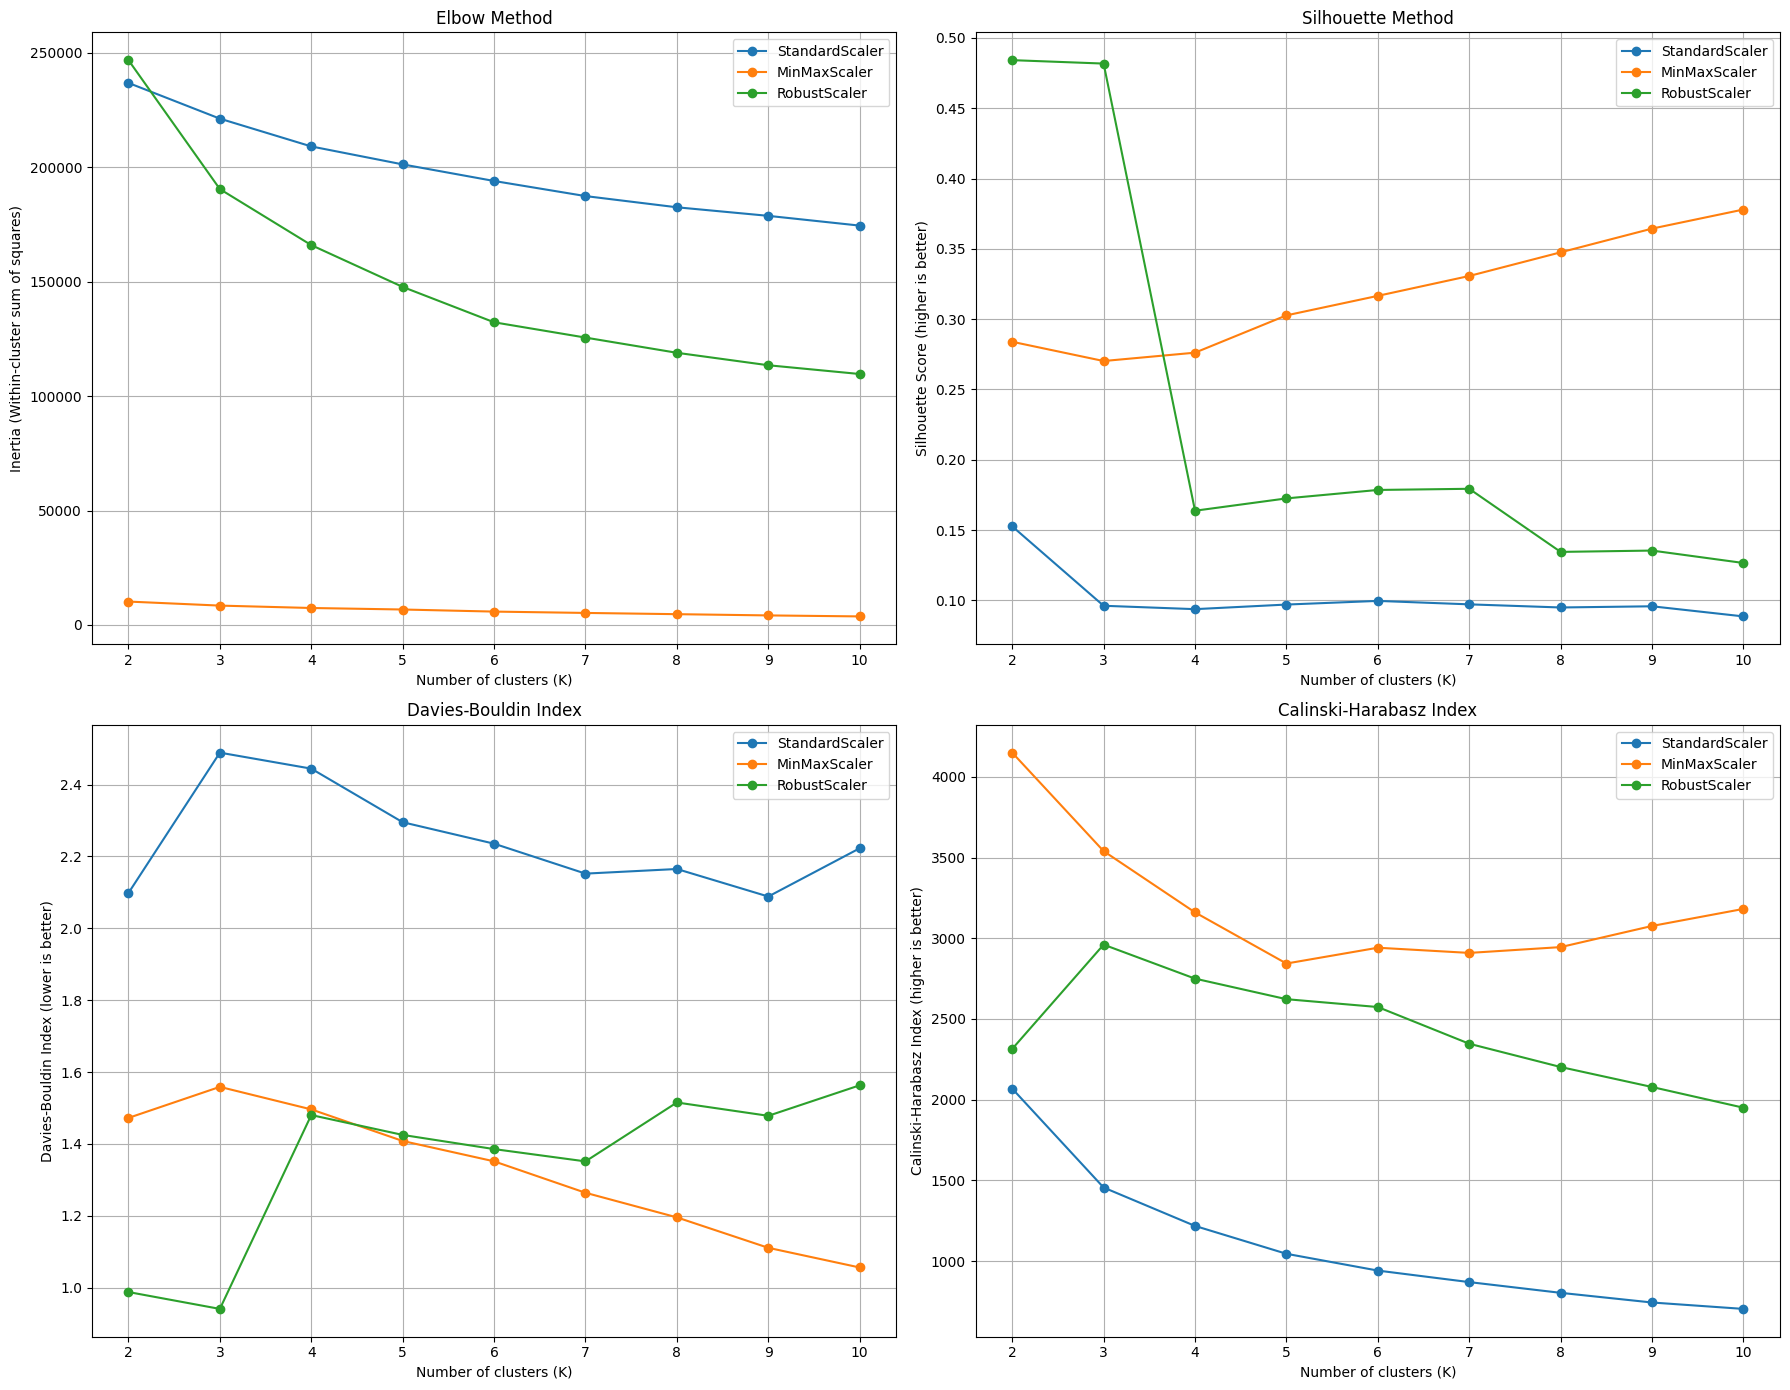

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Let's use the same features we used for the ML models
X_for_clustering = X.copy()

# Test different scaling methods - important for League of Legends stats with different ranges
scalers = {
    'StandardScaler': StandardScaler(),  # Good for goldDiff and other features with outliers
    'MinMaxScaler': MinMaxScaler(),      # Might work better for kills/deaths that have natural bounds
    'RobustScaler': RobustScaler()       # Could be good if there are outlier games
}

# Store results for each configuration
results = {}

for scaler_name, scaler in scalers.items():
    print(f"\nTesting clustering with {scaler_name}")
    X_scaled = scaler.fit_transform(X_for_clustering)
    
    # Store metrics for each K value
    metrics = {
        'inertia': [],
        'silhouette': [],
        'davies_bouldin': [],
        'calinski': []
    }
    
    best_kmeans_models = {}
    
    # Test from 2 to 10 clusters
    k_range = range(2, 11)
    
    for k in k_range:
        best_score = -1
        best_model = None
        
        # Try both initialization methods
        for init_method in ['k-means++', 'random']:
            # Try different numbers of initializations
            for n_init_val in [10, 20, 50]:
                kmeans = KMeans(
                    n_clusters=k,
                    init=init_method,
                    n_init=n_init_val,
                    random_state=42
                )
                kmeans.fit(X_scaled)
                labels = kmeans.labels_
                
                # Calculate quality metrics
                silhouette = silhouette_score(X_scaled, labels)
                
                # Track the best model for this K
                if silhouette > best_score:
                    best_score = silhouette
                    best_model = kmeans
                    
                    print(f"K={k}, init={init_method}, n_init={n_init_val}, "
                          f"Silhouette={silhouette:.4f}")
        
        # Store the best model and its metrics for this K
        best_kmeans_models[k] = best_model
        labels = best_model.labels_
        
        # Store all metrics for the best model at this K
        metrics['inertia'].append(best_model.inertia_)
        metrics['silhouette'].append(silhouette_score(X_scaled, labels))
        metrics['davies_bouldin'].append(davies_bouldin_score(X_scaled, labels))
        metrics['calinski'].append(calinski_harabasz_score(X_scaled, labels))
    
    # Store results for this scaler
    results[scaler_name] = {
        'metrics': metrics,
        'models': best_kmeans_models
    }

# Visualize results across all scalers and metrics
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Plot inertia (elbow method)
for scaler_name, result in results.items():
    axes[0, 0].plot(k_range, result['metrics']['inertia'], 'o-', label=scaler_name)
axes[0, 0].set_xlabel('Number of clusters (K)')
axes[0, 0].set_ylabel('Inertia (Within-cluster sum of squares)')
axes[0, 0].set_title('Elbow Method')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot silhouette scores
for scaler_name, result in results.items():
    axes[0, 1].plot(k_range, result['metrics']['silhouette'], 'o-', label=scaler_name)
axes[0, 1].set_xlabel('Number of clusters (K)')
axes[0, 1].set_ylabel('Silhouette Score (higher is better)')
axes[0, 1].set_title('Silhouette Method')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot Davies-Bouldin scores
for scaler_name, result in results.items():
    axes[1, 0].plot(k_range, result['metrics']['davies_bouldin'], 'o-', label=scaler_name)
axes[1, 0].set_xlabel('Number of clusters (K)')
axes[1, 0].set_ylabel('Davies-Bouldin Index (lower is better)')
axes[1, 0].set_title('Davies-Bouldin Index')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot Calinski-Harabasz scores
for scaler_name, result in results.items():
    axes[1, 1].plot(k_range, result['metrics']['calinski'], 'o-', label=scaler_name)
axes[1, 1].set_xlabel('Number of clusters (K)')
axes[1, 1].set_ylabel('Calinski-Harabasz Index (higher is better)')
axes[1, 1].set_title('Calinski-Harabasz Index')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

### StandardScaler:
 Standardizează caracteristicile scăzând media și împărțind la deviația standard. Bun pentru metrici precum goldDiff care pot avea valori extreme în meciurile foarte dezechilibrate.

### MinMaxScaler:
 Transformă caracteristicile în intervalul [0,1]. Poate fi mai potrivit pentru statistici de ucideri/morți care au limite naturale.

### RobustScaler:
 Utilizează cuartile în loc de medie și deviație standard, fiind mai puțin influențat de outlieri. Util pentru a gestiona meciurile atipice (foarte dezechilibrate).

## Silhouette Score (mai mare e mai bun):
 Măsoară cât de similar este un punct cu propriul cluster comparativ cu alte clustere. Valori mari indică o bună separare a stilurilor de joc.

## Davies-Bouldin Index (mai mic e mai bun):
 Evaluează distanța medie între clustere raportată la diametrul intern al clusterelor. Util pentru a identifica clustere de strategii de joc distincte.

## Calinski-Harabasz Index (mai mare e mai bun):
 Raportul dintre dispersia între clustere și dispersia în interiorul clusterelor. Ajută la identificarea numărului optim de stiluri de joc distincte.

## Inertia (metoda Elbow):
 Suma pătratelor distanțelor de la fiecare punct la cel mai apropiat centroid. Folosită pentru a identifica unde adăugarea mai multor clustere nu mai aduce beneficii semnificative

In [22]:
# Use feature importance from your Random Forest to select relevant features for clustering
# This reduces noise and improves cluster separation
top_n_features = 10  # Adjust based on feature importance plot
top_features = feature_importance['Feature'].iloc[:top_n_features].values

# Create dataset with only important features
X_top_features = X[top_features]
print(f"Using top {top_n_features} features for clustering: {', '.join(top_features)}")

# Choose the best scaler based on previous results (replace with your choice)
best_scaler = StandardScaler()  # Or whichever performed best
X_scaled_selected = best_scaler.fit_transform(X_top_features)

# Choose the optimal K (from the charts above)
optimal_k = 4  # Update based on your metric analysis

# Best parameters from the search
best_kmeans = KMeans(
    n_clusters=optimal_k,
    init='k-means++',  # Usually better than random
    n_init=50,         # More initializations for stability
    random_state=42
)
cluster_labels = best_kmeans.fit_predict(X_scaled_selected)

# Add labels to original data
df_with_clusters = df.copy()
df_with_clusters['cluster'] = cluster_labels

Using top 10 features for clustering: blueGoldDiff, blueExperienceDiff, blueGoldPerMin, redGoldPerMin, blueTotalExperience, redTotalExperience, blueCSPerMin, redCSPerMin, blueKills, redKills



Threshold: 0.5
False Positives: 265 (predicted win but was loss)
Accuracy: 0.7227


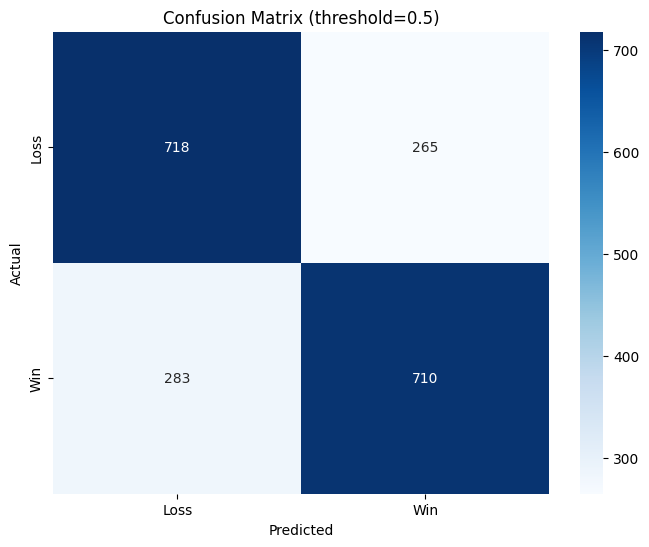


Threshold: 0.6
False Positives: 153 (predicted win but was loss)
Accuracy: 0.7166


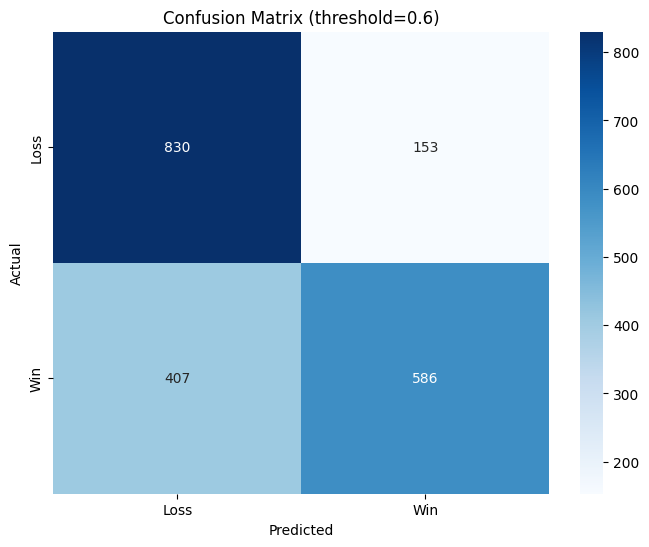


Threshold: 0.7
False Positives: 78 (predicted win but was loss)
Accuracy: 0.6827


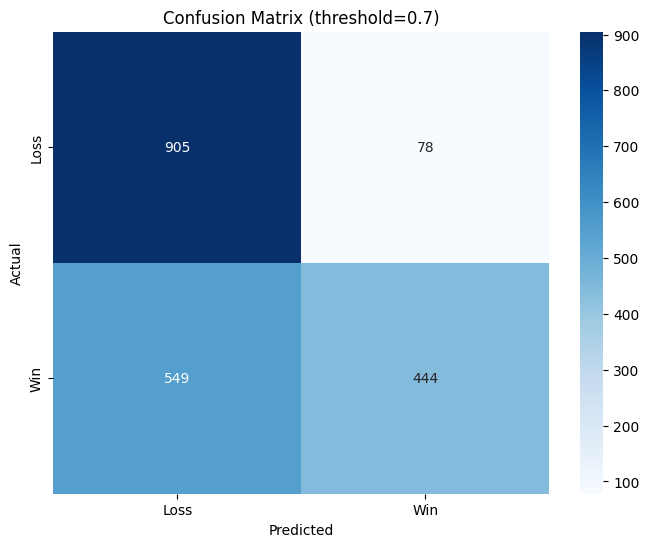


Threshold: 0.8
False Positives: 40 (predicted win but was loss)
Accuracy: 0.6118


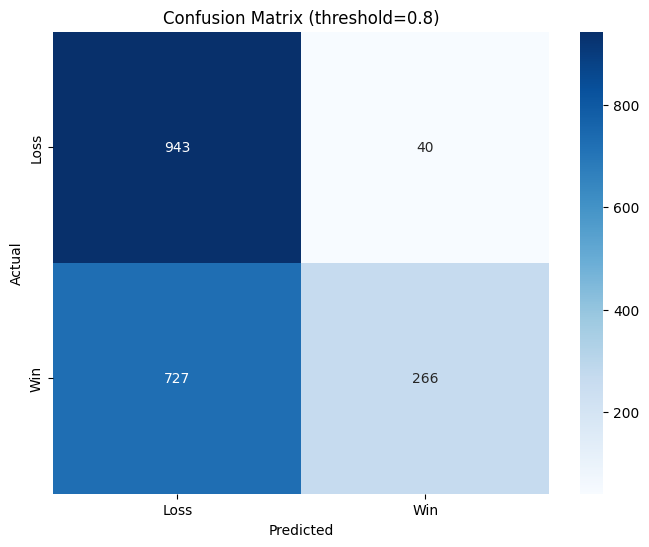


Threshold: 0.9
False Positives: 2 (predicted win but was loss)
Accuracy: 0.5395


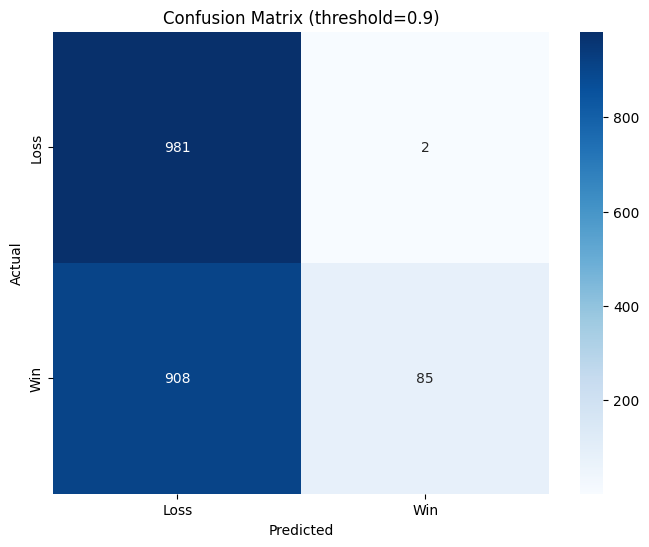

In [23]:
# Get probability predictions
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

# Try different thresholds and evaluate
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in thresholds:
    # Apply custom threshold
    y_pred_custom = (y_pred_proba >= threshold).astype(int)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred_custom)
    
    # Calculate metrics
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    print(f"\nThreshold: {threshold}")
    print(f"False Positives: {fp} (predicted win but was loss)")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Loss', 'Win'], 
                yticklabels=['Loss', 'Win'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (threshold={threshold})')
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_14400\1399958889.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_14400\1399958889.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_14400\1399958889.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_14400\1399958889.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` 

<Figure size 1500x1200 with 0 Axes>

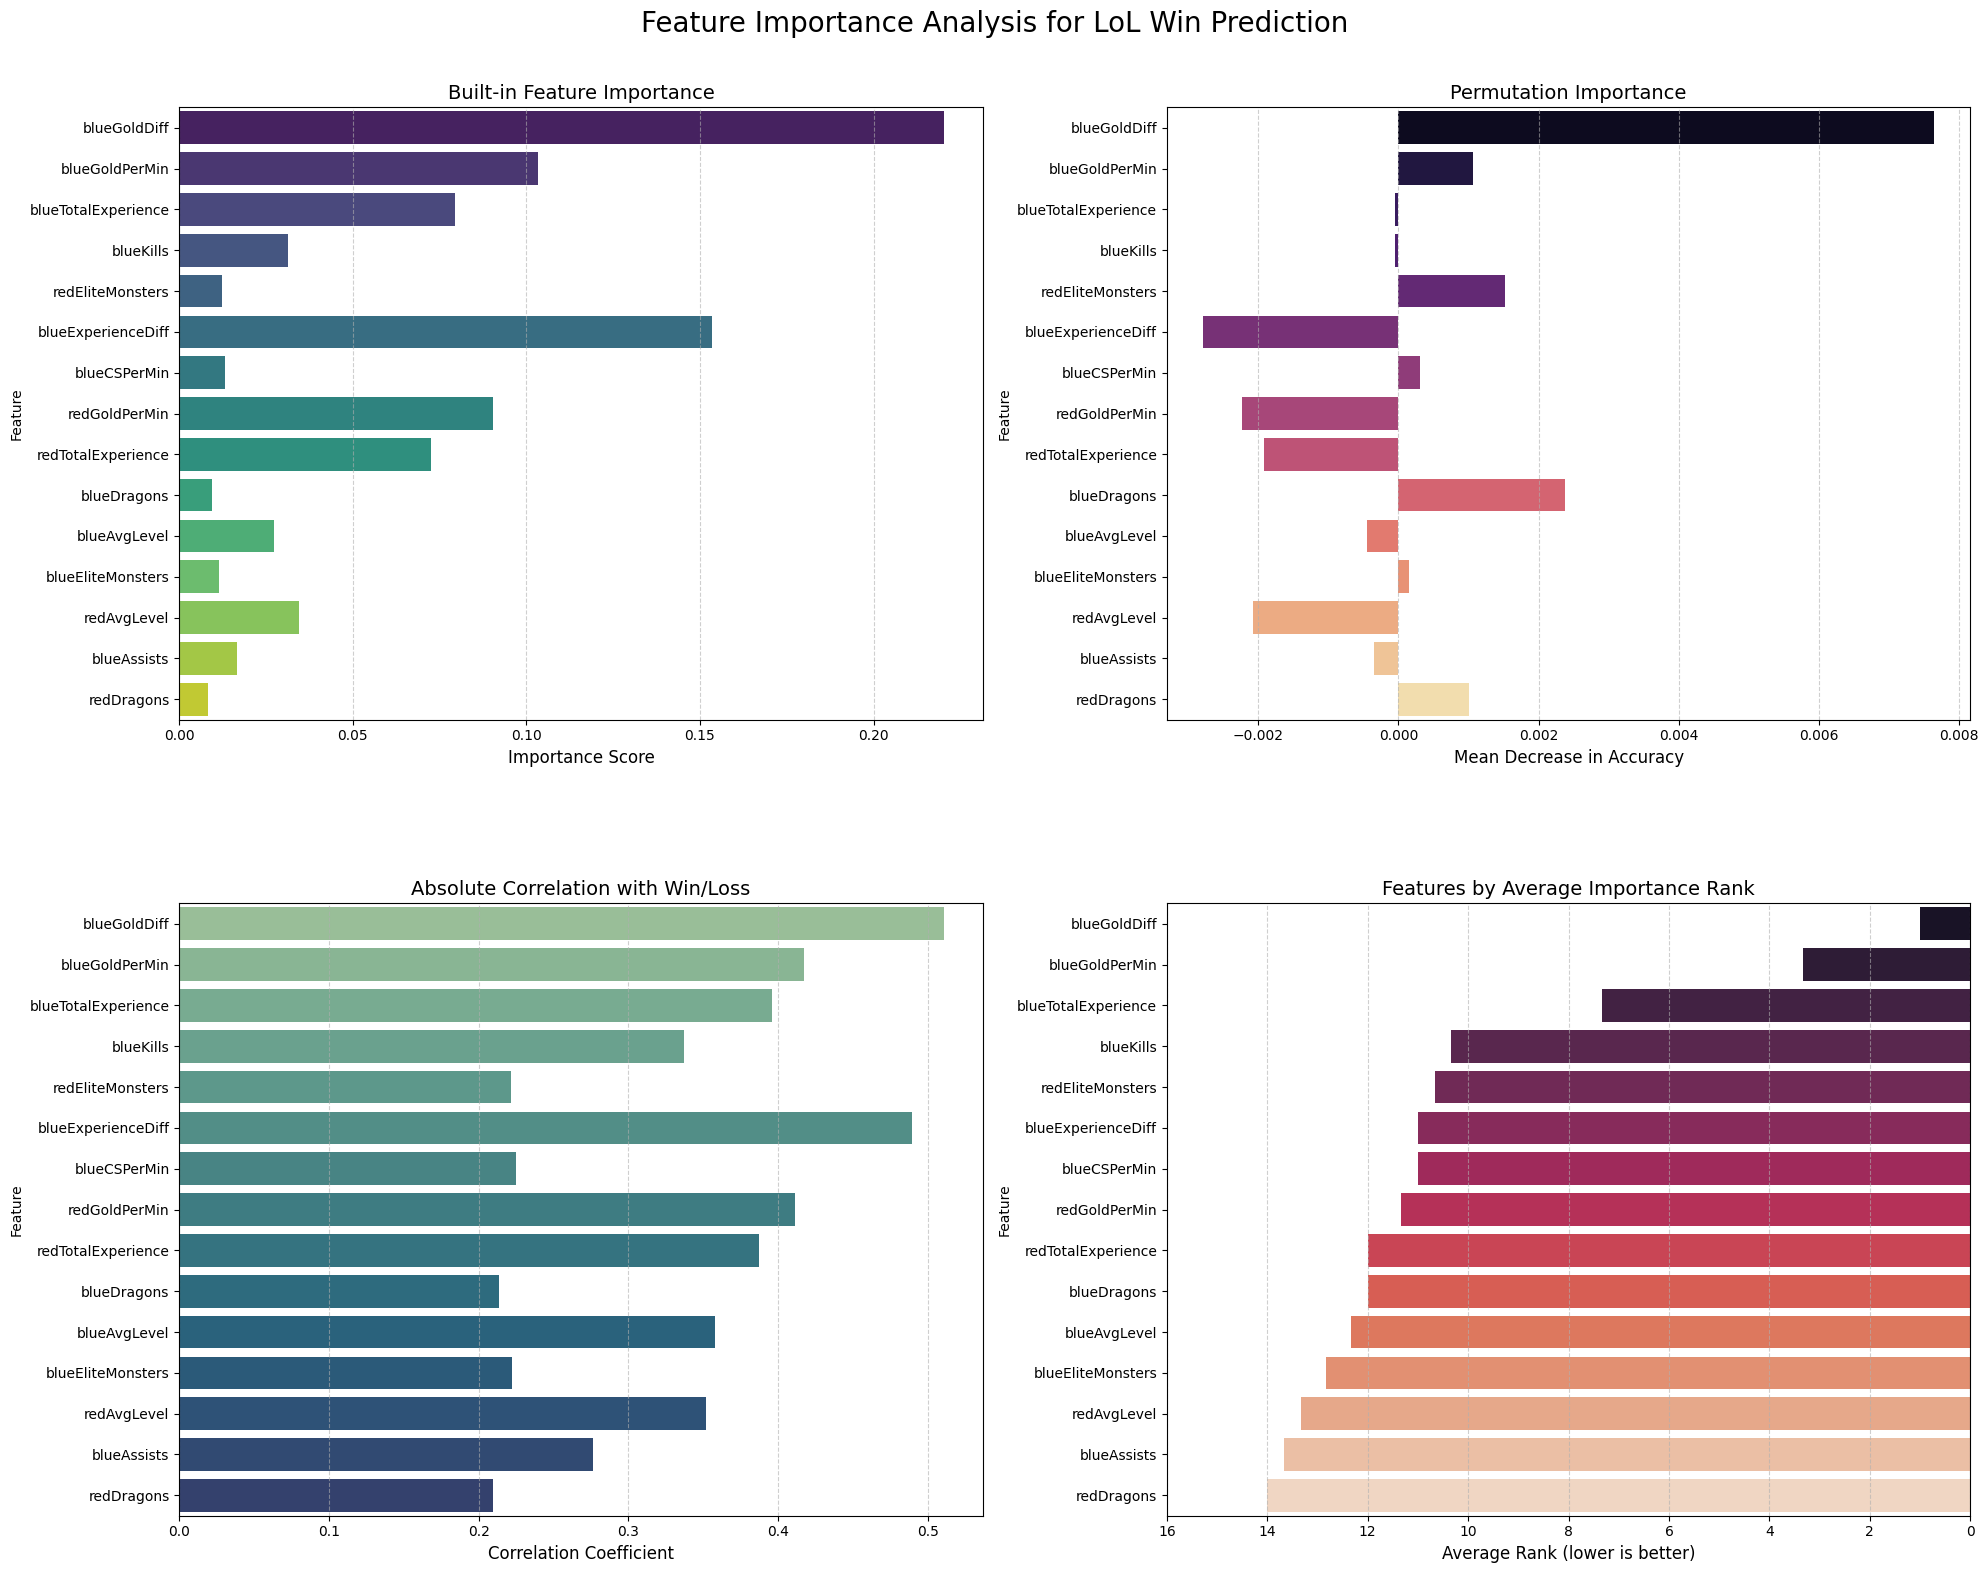

Top 10 Most Important Features:
1. blueGoldDiff: RF Importance = 0.2204, Permutation = 0.0076, Correlation = 0.5111
2. blueGoldPerMin: RF Importance = 0.1033, Permutation = 0.0011, Correlation = 0.4172
3. blueTotalExperience: RF Importance = 0.0793, Permutation = -0.0001, Correlation = 0.3961
4. blueKills: RF Importance = 0.0313, Permutation = -0.0001, Correlation = 0.3374
5. redEliteMonsters: RF Importance = 0.0122, Permutation = 0.0015, Correlation = 0.2216
6. blueExperienceDiff: RF Importance = 0.1536, Permutation = -0.0028, Correlation = 0.4896
7. blueCSPerMin: RF Importance = 0.0133, Permutation = 0.0003, Correlation = 0.2249
8. redGoldPerMin: RF Importance = 0.0903, Permutation = -0.0022, Correlation = 0.4114
9. redTotalExperience: RF Importance = 0.0724, Permutation = -0.0019, Correlation = 0.3876
10. blueDragons: RF Importance = 0.0094, Permutation = 0.0024, Correlation = 0.2138


In [24]:
# Complete Feature Importance Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Set up the figure layout
plt.figure(figsize=(15, 12))

# 1. Get Random Forest's built-in feature importance
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

# 2. Calculate permutation importance (more robust measure)
perm_result = permutation_importance(
    best_rf, X_test_scaled, y_test, 
    n_repeats=10, 
    random_state=42, 
    n_jobs=-1
)
perm_importance = pd.DataFrame({
    'Feature': X.columns,
    'Permutation_Importance': perm_result.importances_mean
}).sort_values('Permutation_Importance', ascending=False)

# 3. Calculate correlation with target
corr_importance = []
for col in X.columns:
    correlation = np.abs(np.corrcoef(X[col], y)[0, 1])
    corr_importance.append((col, correlation))
    
corr_importance = pd.DataFrame(
    corr_importance, 
    columns=['Feature', 'Correlation']
).sort_values('Correlation', ascending=False)

# 4. Combine all methods into one DataFrame
all_importance = rf_importance.merge(
    perm_importance, on='Feature'
).merge(
    corr_importance, on='Feature'
)

# 5. Calculate average rank across all methods
for method in ['Importance', 'Permutation_Importance', 'Correlation']:
    all_importance[f'{method}_Rank'] = all_importance[method].rank(ascending=False)

all_importance['Average_Rank'] = all_importance[[
    'Importance_Rank', 'Permutation_Importance_Rank', 'Correlation_Rank'
]].mean(axis=1)

all_importance = all_importance.sort_values('Average_Rank')

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot 1: Random Forest built-in importance
sns.barplot(
    x='Importance', y='Feature', 
    data=all_importance.head(15),
    palette='viridis',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Built-in Feature Importance', fontsize=14)
axes[0, 0].set_xlabel('Importance Score', fontsize=12)
axes[0, 0].grid(axis='x', linestyle='--', alpha=0.6)

# Plot 2: Permutation importance
sns.barplot(
    x='Permutation_Importance', y='Feature', 
    data=all_importance.head(15),
    palette='magma',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Permutation Importance', fontsize=14)
axes[0, 1].set_xlabel('Mean Decrease in Accuracy', fontsize=12)
axes[0, 1].grid(axis='x', linestyle='--', alpha=0.6)

# Plot 3: Correlation with target
sns.barplot(
    x='Correlation', y='Feature', 
    data=all_importance.head(15),
    palette='crest',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Absolute Correlation with Win/Loss', fontsize=14)
axes[1, 0].set_xlabel('Correlation Coefficient', fontsize=12)
axes[1, 0].grid(axis='x', linestyle='--', alpha=0.6)

# Plot 4: Average rank across all methods
rank_data = all_importance.head(15).copy()
sns.barplot(
    x='Average_Rank', y='Feature', 
    data=rank_data,
    palette='rocket',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Features by Average Importance Rank', fontsize=14)
axes[1, 1].set_xlabel('Average Rank (lower is better)', fontsize=12)
axes[1, 1].set_xlim(0, max(16, rank_data['Average_Rank'].max() + 1))
axes[1, 1].invert_xaxis()  # Lower rank is better
axes[1, 1].grid(axis='x', linestyle='--', alpha=0.6)

plt.suptitle('Feature Importance Analysis for LoL Win Prediction', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.subplots_adjust(hspace=0.3)
plt.show()

# Print top 10 most important features according to average rank
print("Top 10 Most Important Features:")
for i, (_, row) in enumerate(all_importance.head(10).iterrows()):
    print(f"{i+1}. {row['Feature']}: RF Importance = {row['Importance']:.4f}, " +
          f"Permutation = {row['Permutation_Importance']:.4f}, Correlation = {row['Correlation']:.4f}")

## Cunoștințe Noi pentru Domeniu
### Indispensabilitatea avantajului economic 

Datele confirmă empiric importanța primelor 10 minute pentru rezultatul final
Implicații pentru antrenament: focalizare pe optimizarea fazei de laning și primele rotații

### Relevanța diferită a statisticilor pe nivele de joc

În meta-ul actual, controlul obiectivelor și diferența de minioni sunt mai predictive decât simpla diferență de ucideri
Acest insight contrazice concepția populară că "numărul de kill-uri câștigă meciuri"

### Importanța vision control-ului

Ward-urile plasate și distruse apar consecvent în caracteristicile importante
Confirmă științific valoarea acestui aspect al jocului, adesea neglijat în ligile inferioare

### Echilibrul dintre strategii

Existența clusterului cu stil specific indică viabilitatea mai multor abordări
Sugerează că nu există o singură "rețetă" pentru victorie, ci mai degrabă avantaje relative care trebuie valorificate

In [38]:
# Extragerea unui exemplu specific din setul de test
index = 34  # Putem alege orice index din setul de test
example = X_test.iloc[index:index+1]
actual_outcome = y_test.iloc[index]
scaled_example = scaler.transform(example)

# Obținerea predicției și probabilităților
prediction = best_rf.predict(scaled_example)[0]
prediction_proba = best_rf.predict_proba(scaled_example)[0]

# Afișarea informațiilor despre exemplu
print(f"Predicție: {'Victorie' if prediction == 1 else 'Înfrângere'} pentru echipa albastră")
print(f"Probabilitate: {prediction_proba[1]:.4f} (sau {prediction_proba[1]*100:.1f}%)")
print(f"Rezultatul real: {'Victorie' if actual_outcome == 1 else 'Înfrângere'}")

# Extras caracteristicile meciului
print("\nCaracteristicile meciului:")
for feature, value in example.iloc[0].items():
    print(f"{feature}: {value:.2f}")

Predicție: Victorie pentru echipa albastră
Probabilitate: 0.5334 (sau 53.3%)
Rezultatul real: Victorie

Caracteristicile meciului:
blueWardsPlaced: 13.00
blueWardsDestroyed: 0.00
blueFirstBlood: 0.00
blueKills: 9.00
blueAssists: 10.00
blueEliteMonsters: 1.00
blueDragons: 0.00
blueHeralds: 1.00
blueTowersDestroyed: 0.00
blueAvgLevel: 7.00
blueTotalExperience: 18181.00
blueTotalJungleMinionsKilled: 74.00
blueGoldDiff: 616.00
blueExperienceDiff: 43.00
blueCSPerMin: 19.40
blueGoldPerMin: 1749.10
redWardsPlaced: 15.00
redWardsDestroyed: 2.00
redKills: 6.00
redAssists: 5.00
redEliteMonsters: 1.00
redDragons: 1.00
redHeralds: 0.00
redTowersDestroyed: 0.00
redAvgLevel: 6.80
redTotalExperience: 18138.00
redTotalJungleMinionsKilled: 36.00
redCSPerMin: 25.30
redGoldPerMin: 1687.50



Top 5 caracteristici cu cea mai mare influență pentru această predicție:
blueGoldDiff: valoarea 616.00 crește șansa de victorie cu 3.8%
blueTotalJungleMinionsKilled: valoarea 74.00 crește șansa de victorie cu 2.1%
blueGoldPerMin: valoarea 1749.10 crește șansa de victorie cu 1.6%
redDragons: valoarea 1.00 scade șansa de victorie cu 1.3%
redGoldPerMin: valoarea 1687.50 scade șansa de victorie cu 1.2%


C:\Users\User\AppData\Local\Temp\ipykernel_14400\1629278572.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contribution', y='Feature', data=contributions_df.head(10), palette=colors)


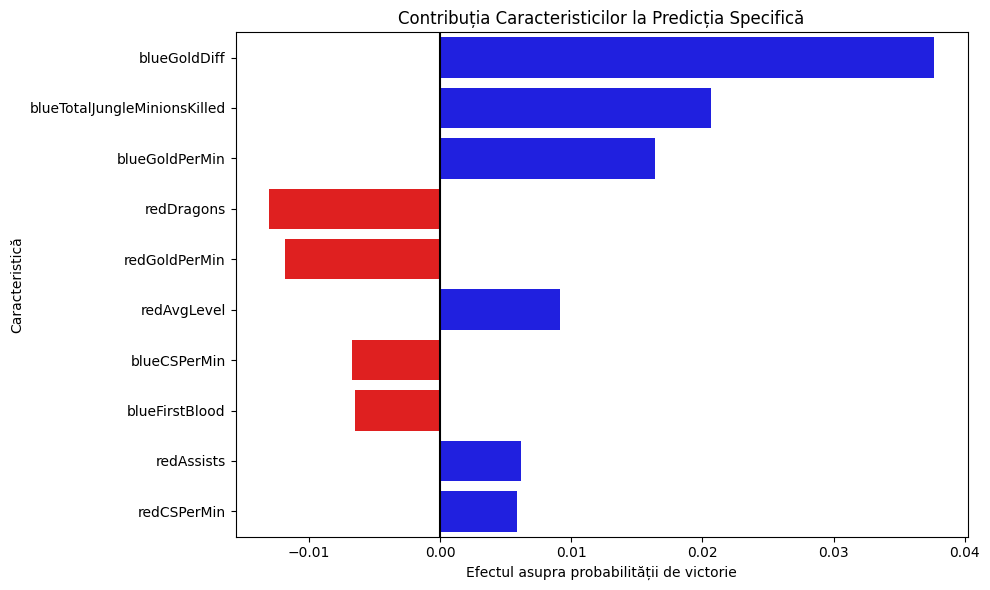

In [39]:
# Calcularea contribuției fiecărei caracteristici pentru acest exemplu specific
feature_contributions = []

# Pentru fiecare caracteristică, evaluăm cum se schimbă predicția când o modificăm
for feature_idx, feature_name in enumerate(example.columns):
    # Creăm o copie a exemplului
    modified_example = scaled_example.copy()
    
    # Setăm valoarea caracteristicii la media din setul de antrenament (neutralizăm efectul)
    feature_mean = np.mean(X_train_scaled[:, feature_idx])
    original_value = modified_example[0, feature_idx]
    modified_example[0, feature_idx] = feature_mean
    
    # Calculăm noua probabilitate de predicție
    new_proba = best_rf.predict_proba(modified_example)[0, 1]
    
    # Calculăm contribuția (diferența în probabilitate)
    contribution = prediction_proba[1] - new_proba
    
    # Stocăm rezultatul
    feature_contributions.append({
        'Feature': feature_name,
        'Original_Value': example[feature_name].values[0],
        'Contribution': contribution,
        'Direction': 'Pozitiv' if contribution > 0 else 'Negativ'
    })

# Convertim la DataFrame pentru vizualizare
contributions_df = pd.DataFrame(feature_contributions)
contributions_df = contributions_df.sort_values('Contribution', key=abs, ascending=False)

# Afișăm top 5 caracteristici cu cea mai mare influență
print("\nTop 5 caracteristici cu cea mai mare influență pentru această predicție:")
for i, row in contributions_df.head(5).iterrows():
    direction = "crește" if row['Contribution'] > 0 else "scade"
    print(f"{row['Feature']}: valoarea {row['Original_Value']:.2f} {direction} șansa de victorie cu {abs(row['Contribution'])*100:.1f}%")

# Vizualizarea contribuțiilor
plt.figure(figsize=(10, 6))
colors = ['blue' if x > 0 else 'red' for x in contributions_df.head(10)['Contribution']]
sns.barplot(x='Contribution', y='Feature', data=contributions_df.head(10), palette=colors)
plt.title('Contribuția Caracteristicilor la Predicția Specifică')
plt.axvline(x=0, color='black', linestyle='-')
plt.xlabel('Efectul asupra probabilității de victorie')
plt.ylabel('Caracteristică')
plt.tight_layout()
plt.show()